## 5 - Experimental Condition Evaluation

##### Imports

In [1]:
import os
import ast
import pandas as pd
import numpy as np
import scipy as su
# from typing import Dict
# from scipy.signal import
# from scikit-learn import

from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import dask.dataframe as dd

import pingouin as pg
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import scipy.stats as stats
import pingouin as pg
from scipy.stats import ttest_rel
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import boxcox
from scipy.stats import friedmanchisquare
from scipy.stats import levene

##### Data Loading (AoI)

In [2]:
# Load AoI ddfs into dictionary
root_dir = './aoi_data'
def load_aoi_data(root_dir): # Get csv file reads into one dictionary
    data = {}
    for file in os.listdir(root_dir):
        file_path = os.path.join(root_dir, file)
        file_name = os.path.splitext(file)[0]  # file name without '.csv'
        data[file_name] = dd.read_csv(file_path)  # read and attach to dict
    return data

data = load_aoi_data(root_dir)
participant_ids = [1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20]

df = data['quest'].iloc[:, 1:].compute()

### 1. Graphs Difficulty + Frequency

In [4]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

##### Overall Score

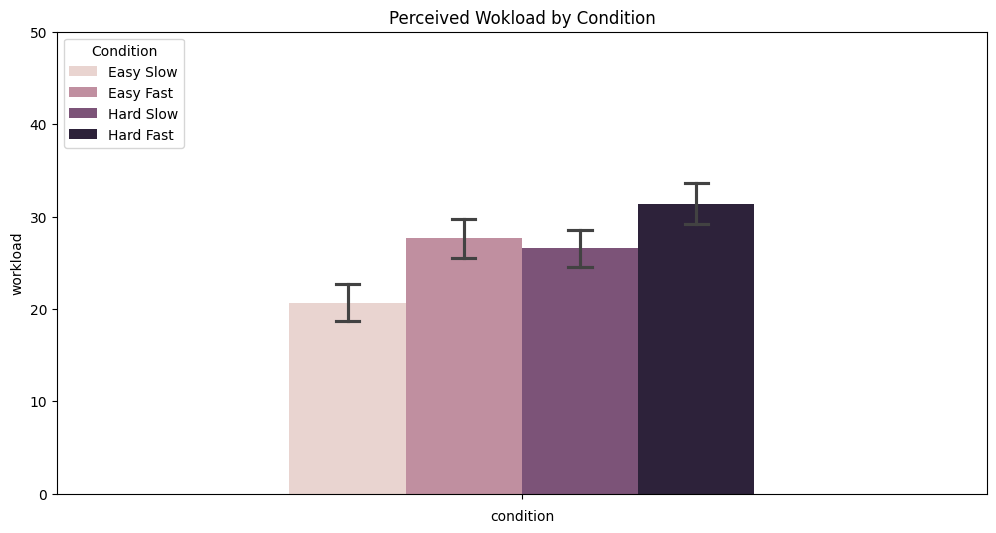

In [5]:
plt.figure(figsize=(12,6))
ax=sns.barplot(
    data=df,
    y='NASA_TLX_Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.ylabel('workload')
plt.ylim(0, 50)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

##### NASA-TLX Dimensions

In [6]:
df_long = pd.melt(df, id_vars=['participant_id', 'condition'], value_vars=['NASA_TLX_01', 'NASA_TLX_02', 'NASA_TLX_03', 'NASA_TLX_04', 'NASA_TLX_05'],
                  var_name='NASA_TLX_Factor', value_name='Score')
df_long = df_long.sort_values(by=['participant_id', 'condition']).reset_index(drop=True)

custom_xtick_labels = [
    'Mental Demand',  # NASA_TLX_01
    'Performance',  # NASA_TLX_02
    'Effort',  # NASA_TLX_03
    'Frustration',  # NASA_TLX_04
    'Temporal Demand',  # NASA_TLX_05
]

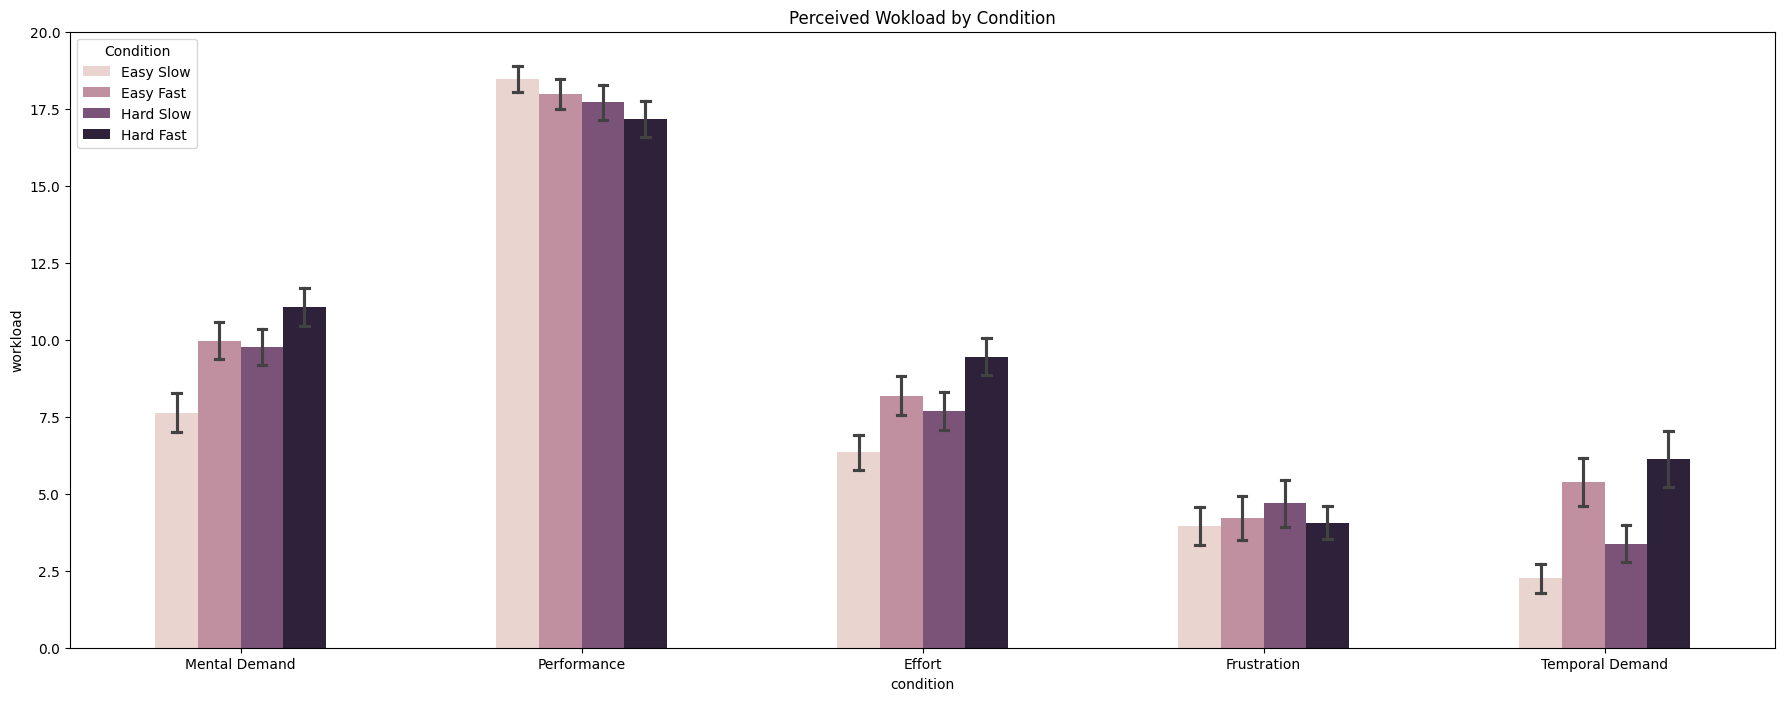

In [7]:
plt.figure(figsize=(22,8))
ax=sns.barplot(
    data=df_long,
    x='NASA_TLX_Factor',
    y='Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.xticks(ticks=ax.get_xticks(), labels=custom_xtick_labels)
plt.ylabel('workload')
plt.ylim(0, 20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

### 2. Graphs Difficulty

In [8]:
# Setup
block_type_mapping = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

custom_labels = ['Easy','Hard']

##### Overall Score

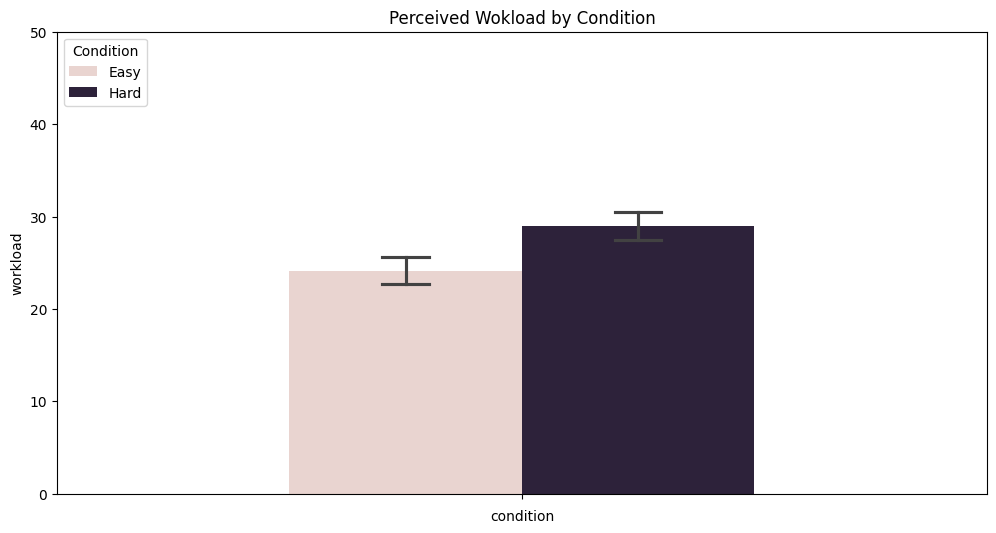

In [9]:
plt.figure(figsize=(12,6))
ax=sns.barplot(
    data=df,
    y='NASA_TLX_Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.ylabel('workload')
plt.ylim(0, 50)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

##### NASA-TLX Dimensions

In [10]:
df_long = pd.melt(df, id_vars=['participant_id', 'condition'], value_vars=['NASA_TLX_01', 'NASA_TLX_02', 'NASA_TLX_03', 'NASA_TLX_04', 'NASA_TLX_05'],
                  var_name='NASA_TLX_Factor', value_name='Score')
df_long = df_long.sort_values(by=['participant_id', 'condition']).reset_index(drop=True)

custom_xtick_labels = [
    'Mental Demand',  # NASA_TLX_01
    'Performance',  # NASA_TLX_02
    'Effort',  # NASA_TLX_03
    'Frustration',  # NASA_TLX_04
    'Temporal Demand',  # NASA_TLX_05
]

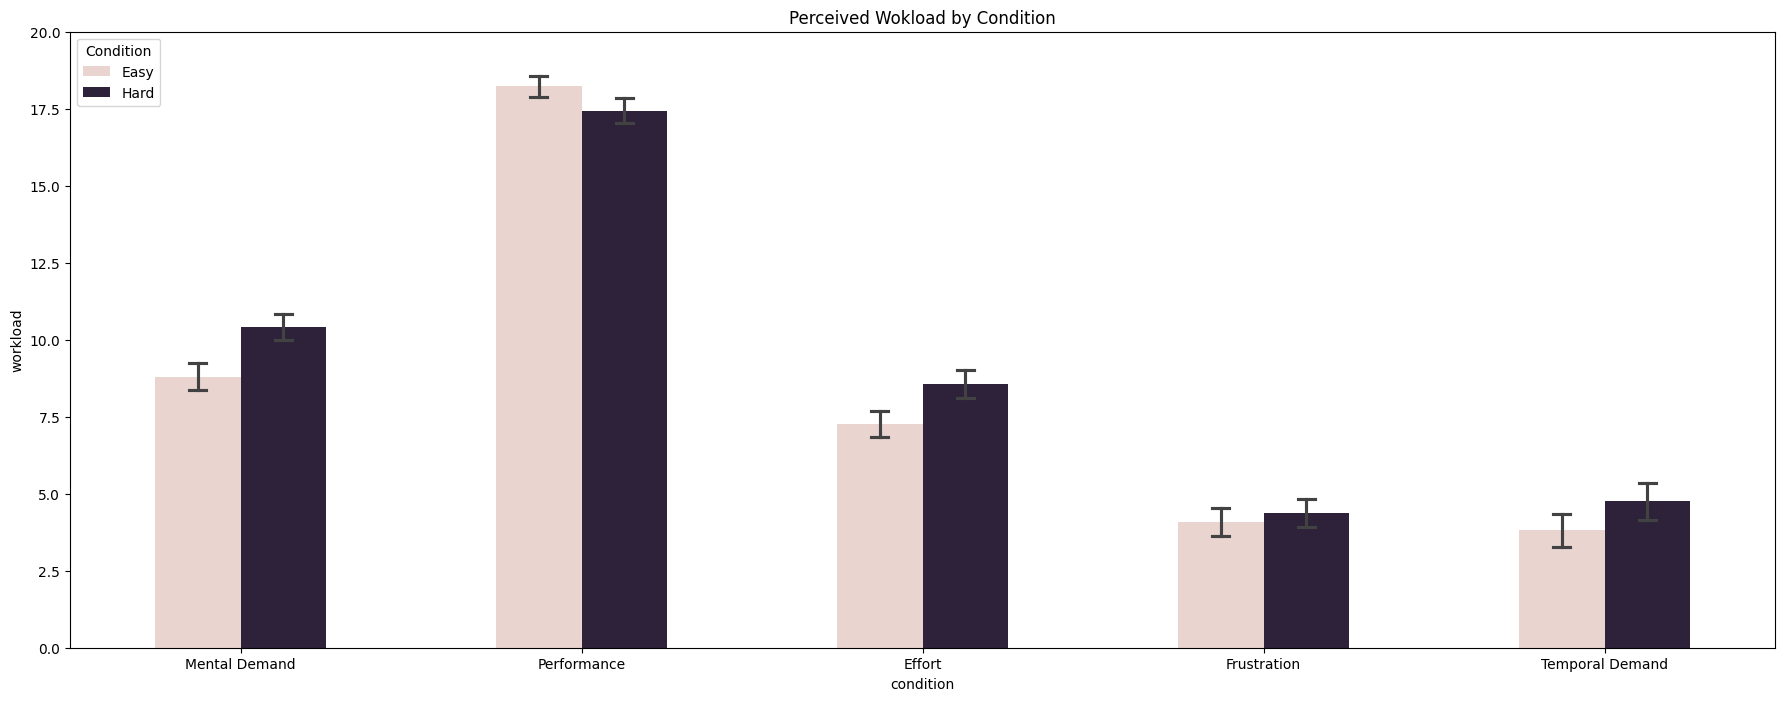

In [11]:
plt.figure(figsize=(22,8))
ax=sns.barplot(
    data=df_long,
    x='NASA_TLX_Factor',
    y='Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.xticks(ticks=ax.get_xticks(), labels=custom_xtick_labels)
plt.ylabel('workload')
plt.ylim(0, 20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

### 3. Graphs Frequency

In [12]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 1,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

custom_labels = ['Slow','Fast']

##### Overall Score

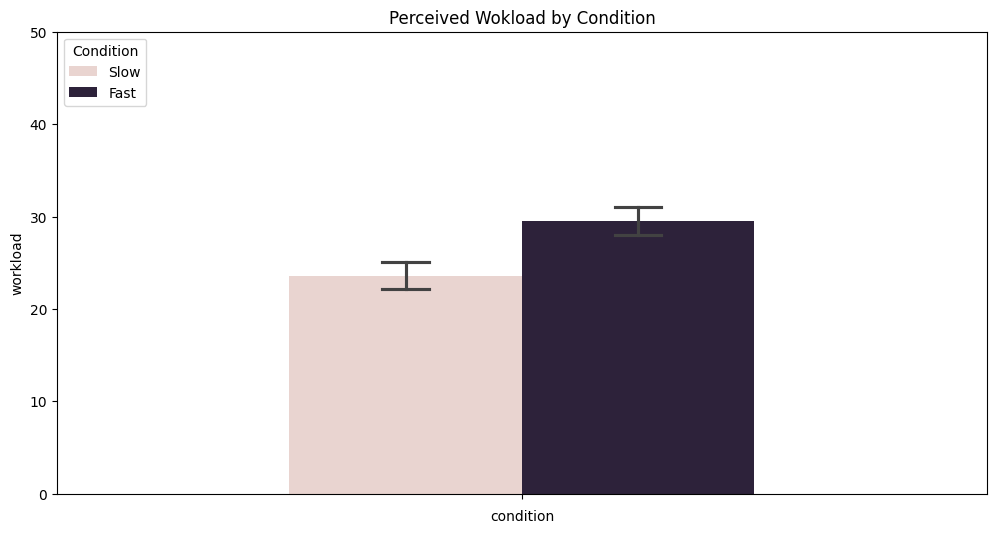

In [13]:
plt.figure(figsize=(12,6))
ax=sns.barplot(
    data=df,
    y='NASA_TLX_Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.ylabel('workload')
plt.ylim(0, 50)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

##### NASA-TLX Dimensions

In [14]:
df_long = pd.melt(df, id_vars=['participant_id', 'condition'], value_vars=['NASA_TLX_01', 'NASA_TLX_02', 'NASA_TLX_03', 'NASA_TLX_04', 'NASA_TLX_05'],
                  var_name='NASA_TLX_Factor', value_name='Score')
df_long = df_long.sort_values(by=['participant_id', 'condition']).reset_index(drop=True)

custom_xtick_labels = [
    'Mental Demand',  # NASA_TLX_01
    'Performance',  # NASA_TLX_02
    'Effort',  # NASA_TLX_03
    'Frustration',  # NASA_TLX_04
    'Temporal Demand',  # NASA_TLX_05
]

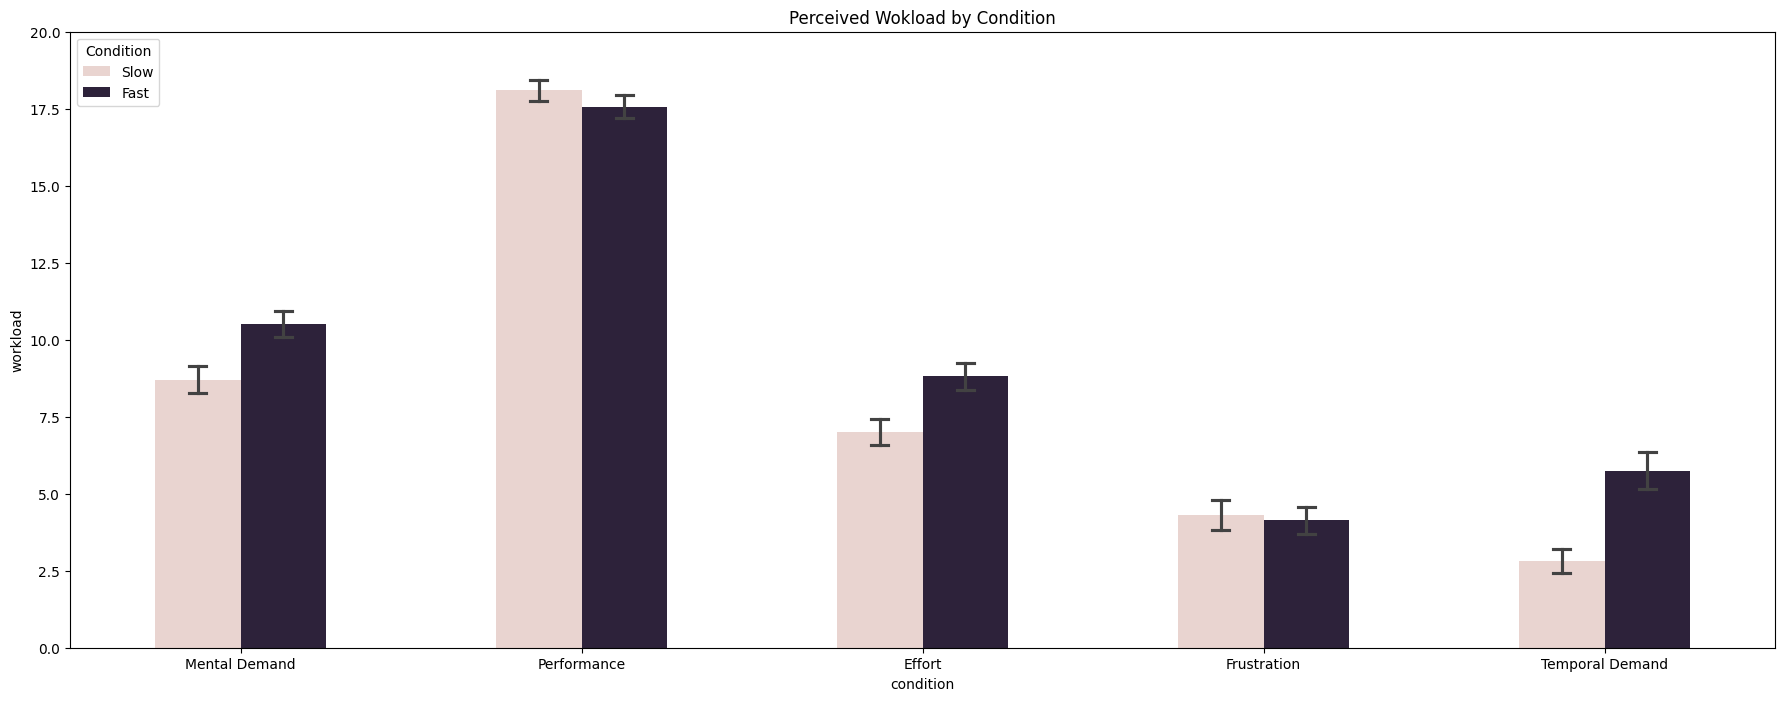

In [15]:
plt.figure(figsize=(22,8))
ax=sns.barplot(
    data=df_long,
    x='NASA_TLX_Factor',
    y='Score',
    hue='condition',
    estimator='mean',
    errorbar='se',
    capsize=0.1,
    width=0.5,
)
plt.title('Perceived Wokload by Condition')
plt.xlabel('condition')
plt.xticks(ticks=ax.get_xticks(), labels=custom_xtick_labels)
plt.ylabel('workload')
plt.ylim(0, 20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Condition', loc='upper left')
plt.show()

### 4. Repeated Measures ANOVA and Paired t-tests

##### Difficulty + Frequency
Assumptions:
- Normal distribution (continuous)
- Residual normality
- Homoscedasticity
- Sphericity

!! BUT conditions are dependent from themselves 

In [16]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

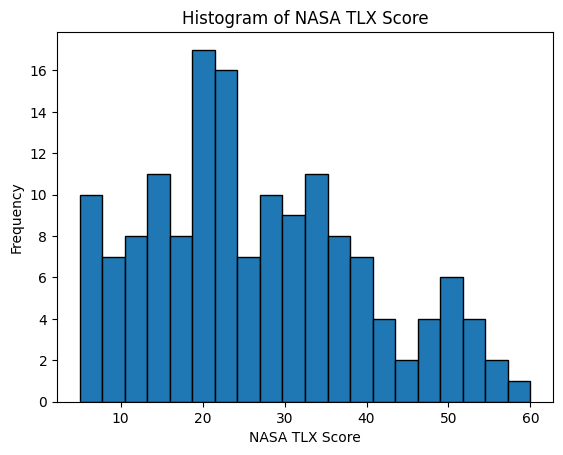

Shapiro-Wilk test p-value: 0.0008275268737014553


In [17]:
# Normlization test
plt.hist(df['NASA_TLX_Score'], bins=20, edgecolor='black')
plt.title('Histogram of NASA TLX Score')
plt.xlabel('NASA TLX Score')
plt.ylabel('Frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

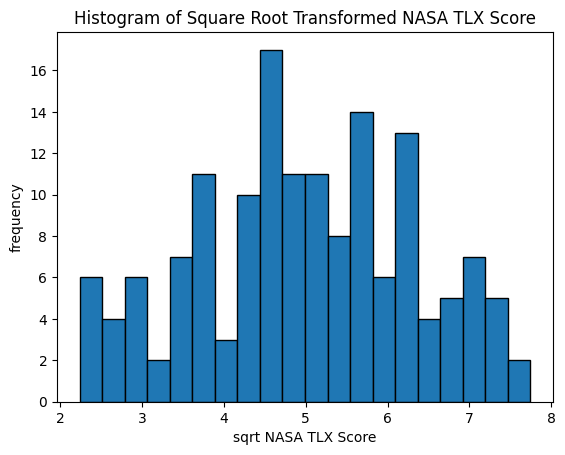

Shapiro-Wilk test p-value: 0.07043301884248478


In [18]:
# Sqrt-normalization + test
df['NASA_TLX_Score_sqrt'] = df['NASA_TLX_Score'].apply(lambda x: np.sqrt(x))

# Re-run histogram to check distribution
plt.hist(df['NASA_TLX_Score_sqrt'], bins=20, edgecolor='black')
plt.title('Histogram of Square Root Transformed NASA TLX Score')
plt.xlabel('sqrt NASA TLX Score')
plt.ylabel('frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score_sqrt'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

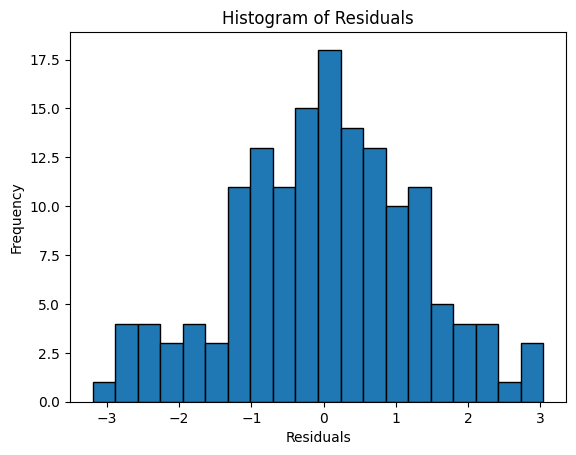

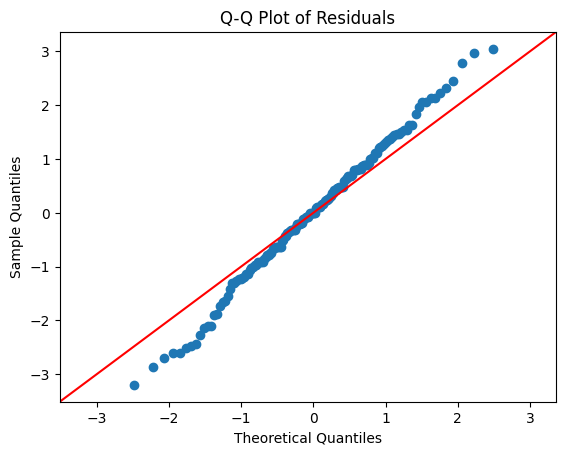

Shapiro-Wilk test p-value: 0.7714171426205076


In [19]:
# Check residuals normality
means = df.groupby('condition')['NASA_TLX_Score_sqrt'].transform('mean')
df['residuals'] = df['NASA_TLX_Score_sqrt'] - means

# Plotting histogram of residuals
plt.hist(df['residuals'], bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(df['residuals'], line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform the Shapiro-Wilk test for normality of residuals
shapiro_test = stats.shapiro(df['residuals'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [20]:
# Check homoscedasticity
# Performing Levene’s test to check for homogeneity of variances
levene_test = levene(df[df['condition'] == 1]['NASA_TLX_Score_sqrt'],
                     df[df['condition'] == 2]['NASA_TLX_Score_sqrt'],
                     df[df['condition'] == 3]['NASA_TLX_Score_sqrt'],
                     df[df['condition'] == 4]['NASA_TLX_Score_sqrt'])
print(f'Levene test p-value: {levene_test.pvalue}')

Levene test p-value: 0.9517064049931924


--> Variance is homogeneous

In [21]:
# Check Sphericity
# Performing Mauchly's test for sphericity
mauchly_test = pg.sphericity(
    data=df, dv='NASA_TLX_Score_sqrt',
    subject='participant_id',
    within='condition')

# Print the sphericity test results
print(f"Mauchly's W statistic: {mauchly_test.W}")
print(f"Chi-square value: {mauchly_test.chi2}")
print(f"Degrees of freedom: {mauchly_test.dof}")
print(f"Mauchly's test p-value: {mauchly_test.pval}")

Mauchly's W statistic: 0.719051792480996
Chi-square value: 5.515354935101674
Degrees of freedom: 5
Mauchly's test p-value: 0.35699056568092047


--> Spherical

In [22]:
# RM ANOVA with spericity correction details
aov_results = pg.rm_anova(dv='NASA_TLX_Score_sqrt', within='condition', subject='participant_id', data=df, detailed=True)

# Display the ANOVA table with Greenhouse-Geisser correction
aov_results

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,condition,11.287053,3,3.762351,9.40472,0.000042,0.10149,0.848521
1,Error,21.602657,54,0.400049,NaN,NaN,NaN,NaN


--> significant

In [23]:
# Post-hoc comparisons (pairwise t-test)
posthoc_results = pg.pairwise_tests(dv='NASA_TLX_Score_sqrt', within='condition', subject='participant_id', data=df, padjust='bonf', alternative='less')
print(posthoc_results)

# Calculate Family Error rate
familyErr = 1 - ((1 - .05) ** 6) # .05 is alpha, 6 is the num of combinations
print(f"\nFamily Error rate: {familyErr}")

    Contrast  A  B  Paired  Parametric         T   dof alternative     p-unc  \
0  condition  1  2    True        True -4.493079  18.0        less  0.000141   
1  condition  1  3    True        True -2.882007  18.0        less  0.004962   
2  condition  1  4    True        True -4.275734  18.0        less  0.000227   
3  condition  2  3    True        True  0.525663  18.0        less  0.697231   
4  condition  2  4    True        True -1.745987  18.0        less  0.048929   
5  condition  3  4    True        True -1.944485  18.0        less  0.033817   

     p-corr p-adjust     BF10    hedges  
0  0.000844     bonf  224.297 -0.622356  
1  0.029770     bonf   10.471 -0.536731  
2  0.001365     bonf  147.003 -0.836815  
3  1.000000     bonf    0.538  0.083245  
4  0.293573     bonf    1.696 -0.270556  
5  0.202900     bonf    2.241 -0.344726  

Family Error rate: 0.2649081093750002


--> Significance between Easy_Slow & Hard_Slow, and Easy_Slow & Hard_Fast

In [24]:
# Post-hoc comparisons (Turkey HSD Method)
tukey_results = pairwise_tukeyhsd(endog=df['NASA_TLX_Score_sqrt'], groups=df['condition'], alpha=0.05)
tukey_summary_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
print(tukey_summary_df)

   group1  group2  meandiff   p-adj   lower   upper  reject
0       1       2    0.7351  0.0655 -0.0318  1.5020   False
1       1       3    0.6408  0.1361 -0.1261  1.4077   False
2       1       4    1.0632  0.0024  0.2963  1.8301    True
3       2       3   -0.0942  0.9887 -0.8612  0.6727   False
4       2       4    0.3281  0.6830 -0.4388  1.0950   False
5       3       4    0.4223  0.4822 -0.3446  1.1892   False


--> Significance between Easy_Slow & Hard_Fast

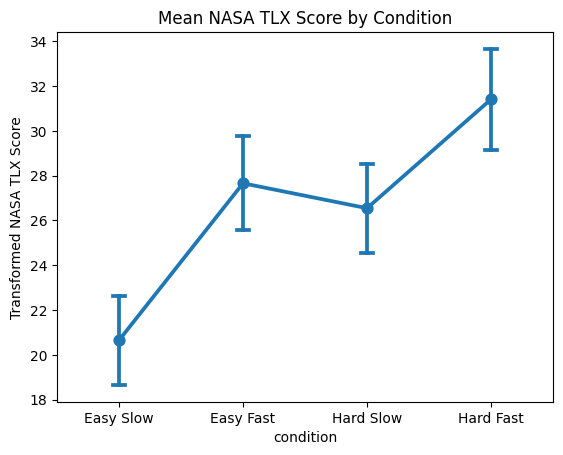

In [25]:
# Interaction plot with denormalized score
df['NASA_TLX_Score_original'] = df['NASA_TLX_Score_sqrt'] ** 2
custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean NASA TLX Score by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
plt.ylabel('Transformed NASA TLX Score')
plt.show()

##### Difficulty
Assumption:
- Difference normality

In [26]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Easy', 'Hard']
pivot_df = pivot_df.reset_index()

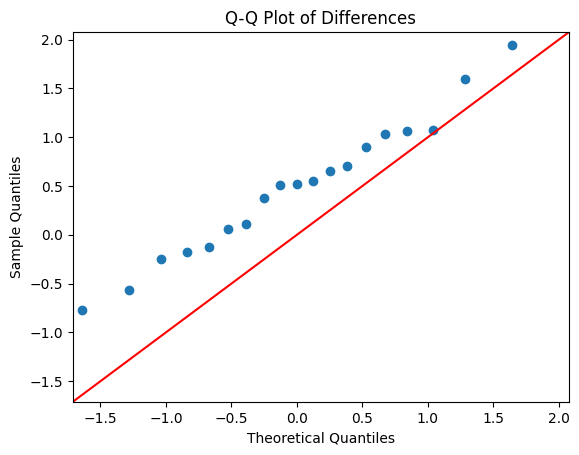

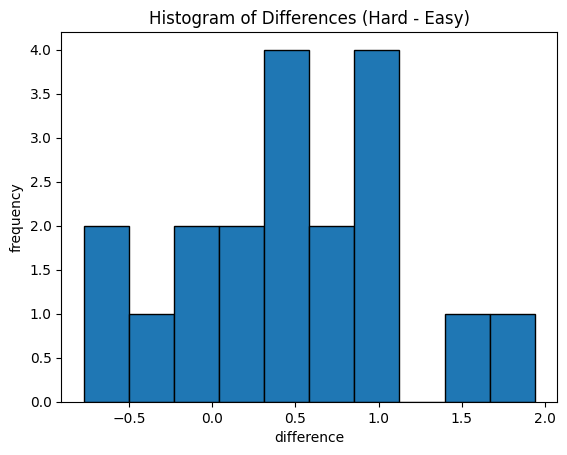

Shapiro-Wilk test p-value: 0.9721728061894795


In [27]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Hard'] - pivot_df['Easy']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Hard - Easy)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [28]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True)
print(paired_ttest_results)

               T  dof alternative   p-val           CI95%   cohen-d BF10  \
T-test -2.993194   18   two-sided  0.0078  [-0.82, -0.14]  0.440006  6.4   

           power  
T-test  0.442638  


--> Significant

In [29]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative   p-val         CI95%   cohen-d  BF10  \
T-test -2.993194   18        less  0.0039  [-inf, -0.2]  0.440006  12.8   

           power  
T-test  0.579378  


--> Significant

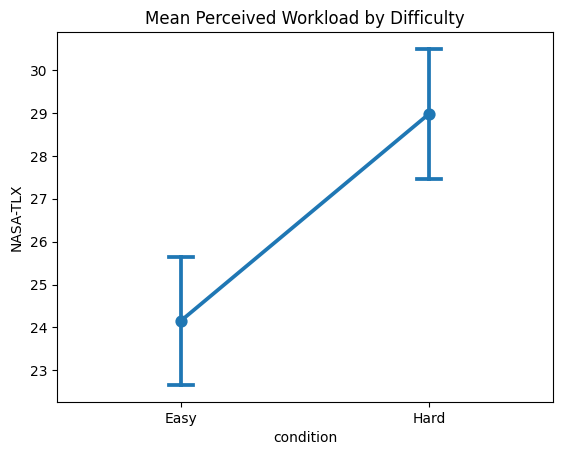

In [30]:
# Interaction plot with denormalized score
df['NASA_TLX_Score_original'] = df['NASA_TLX_Score_sqrt'] ** 2
custom_labels = ['Easy', 'Hard']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Difficulty')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

##### Frequency
Assumption:
- Difference normality

In [31]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 1,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Slow', 'Fast']
pivot_df = pivot_df.reset_index()

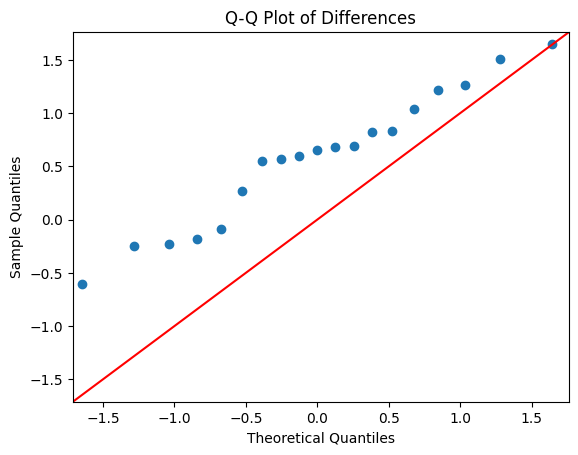

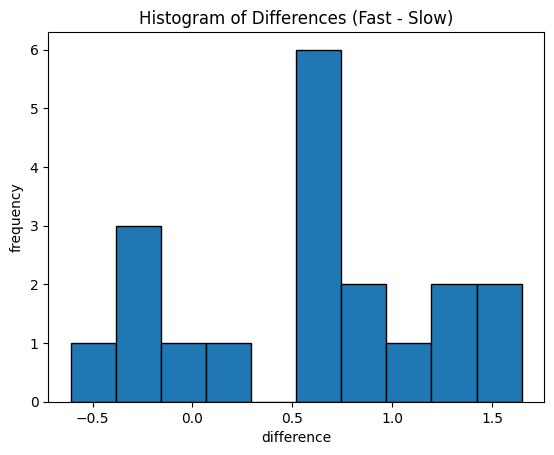

Shapiro-Wilk test p-value: 0.5875808317879587


In [32]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Fast'] - pivot_df['Slow']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Fast - Slow)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [33]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True)
print(paired_ttest_results)

               T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -4.013559   18   two-sided  0.000815  [-0.88, -0.28]  0.531263  44.178   

           power  
T-test  0.591439  


--> Significant

In [34]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative     p-val          CI95%   cohen-d    BF10  \
T-test -4.013559   18        less  0.000407  [-inf, -0.33]  0.531263  88.355   

           power  
T-test  0.719876  


--> Significant

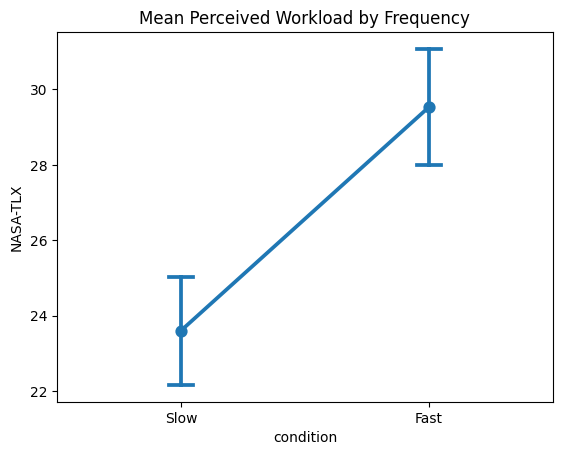

In [35]:
# Interaction plot with denormalized score
df['NASA_TLX_Score_original'] = df['NASA_TLX_Score_sqrt'] ** 2
custom_labels = ['Slow', 'Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Frequency')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

### 5. Repeated Measures ANOVA and Paired t-tests [no temporal demand]

##### Difficulty + Frequency (parametric)
Assumptions:
- Normal distribution (continuous)
- Residual normality
- Homoscedasticity
- Sphericity

In [36]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

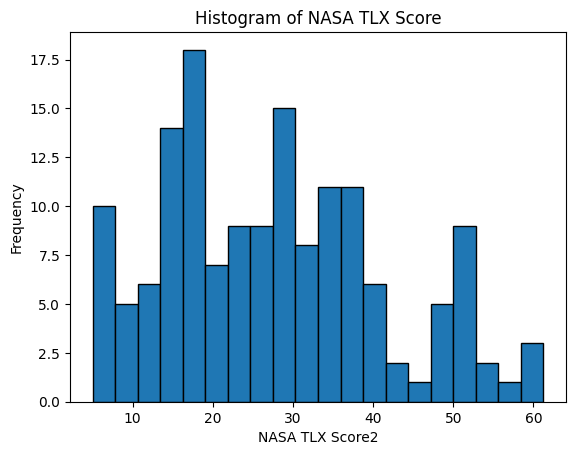

Shapiro-Wilk test p-value: 0.000494988658361429


In [37]:
# Normlization test
plt.hist(df['NASA_TLX_Score2'], bins=20, edgecolor='black')
plt.title('Histogram of NASA TLX Score')
plt.xlabel('NASA TLX Score2')
plt.ylabel('Frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score2'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

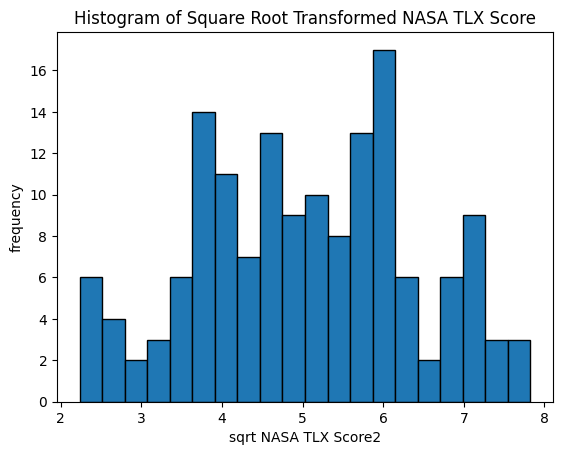

Shapiro-Wilk test p-value: 0.08603909777594376


In [38]:
# Sqrt-normalization + test
df['NASA_TLX_Score2_sqrt'] = df['NASA_TLX_Score2'].apply(lambda x: np.sqrt(x))

# Re-run histogram to check distribution
plt.hist(df['NASA_TLX_Score2_sqrt'], bins=20, edgecolor='black')
plt.title('Histogram of Square Root Transformed NASA TLX Score')
plt.xlabel('sqrt NASA TLX Score2')
plt.ylabel('frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score2_sqrt'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Not Normal distributed, must use a non-parametric method (Friedman Test)

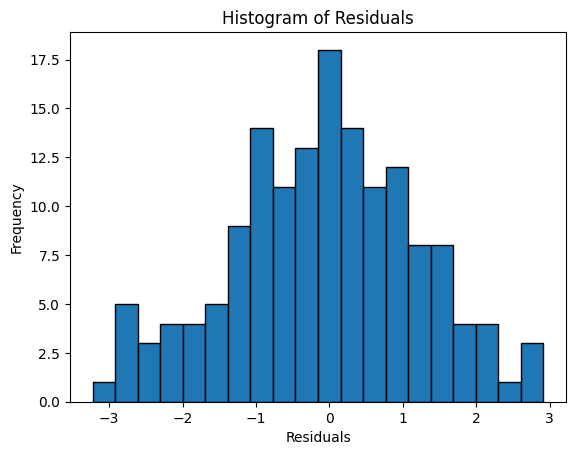

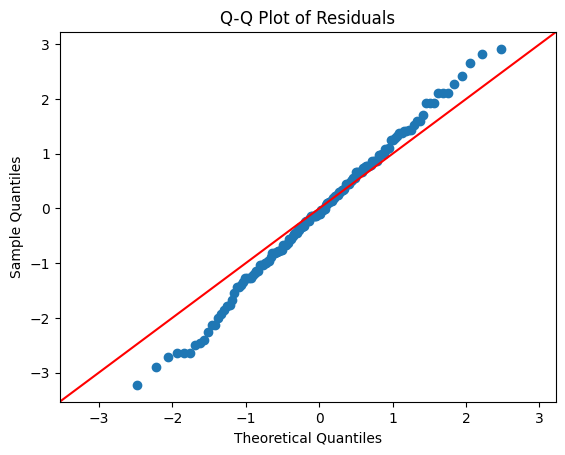

Shapiro-Wilk test p-value: 0.7588497677586241


In [39]:
# Check residuals normality
means = df.groupby('condition')['NASA_TLX_Score2_sqrt'].transform('mean')
df['residuals'] = df['NASA_TLX_Score_sqrt'] - means

# Plotting histogram of residuals
plt.hist(df['residuals'], bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(df['residuals'], line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform the Shapiro-Wilk test for normality of residuals
shapiro_test = stats.shapiro(df['residuals'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [40]:
# Check homoscedasticity
from scipy.stats import levene

# Performing Levene’s test to check for homogeneity of variances
levene_test = levene(df[df['condition'] == 1]['NASA_TLX_Score2_sqrt'],
                     df[df['condition'] == 2]['NASA_TLX_Score2_sqrt'],
                     df[df['condition'] == 3]['NASA_TLX_Score2_sqrt'],
                     df[df['condition'] == 4]['NASA_TLX_Score2_sqrt'])
print(f'Levene test p-value: {levene_test.pvalue}')

Levene test p-value: 0.9784710303087042


--> Variance is homogeneous

In [41]:
# Check Sphericity
# Performing Mauchly's test for sphericity
mauchly_test = pg.sphericity(
    data=df, dv='NASA_TLX_Score2_sqrt',
    subject='participant_id',
    within='condition')

# Print the sphericity test results
print(f"Mauchly's W statistic: {mauchly_test.W}")
print(f"Chi-square value: {mauchly_test.chi2}")
print(f"Degrees of freedom: {mauchly_test.dof}")
print(f"Mauchly's test p-value: {mauchly_test.pval}")

Mauchly's W statistic: 0.6681386382670191
Chi-square value: 6.743396387984442
Degrees of freedom: 5
Mauchly's test p-value: 0.24114696840778235


--> ! No sphericity

Then, Anova with Greenhouse-Geisser (GG) correction

In [42]:
# RM ANOVA with spericity correction details
aov_results = pg.rm_anova(dv='NASA_TLX_Score2_sqrt', within='condition', subject='participant_id', data=df, detailed=True)

# Display the ANOVA table with Greenhouse-Geisser correction
aov_results

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,condition,9.298439,3,3.099480,6.917379,0.000503,0.083166,0.830409
1,Error,24.195854,54,0.448071,NaN,NaN,NaN,NaN


--> significant

In [43]:
# Post-hoc comparisons (pairwise t-test)
posthoc_results = pg.pairwise_tests(dv='NASA_TLX_Score2_sqrt', within='condition', subject='participant_id', data=df, padjust='bonf', alternative='less')
print(posthoc_results)

# Calculate Family Error rate
familyErr = 1 - ((1 - .05) ** 6) # .05 is alpha, 6 is the num of combinations
print(f"\nFamily Error rate: {familyErr}")

    Contrast  A  B  Paired  Parametric         T   dof alternative     p-unc  \
0  condition  1  2    True        True -3.800477  18.0        less  0.000655   
1  condition  1  3    True        True -2.691507  18.0        less  0.007459   
2  condition  1  4    True        True -3.652598  18.0        less  0.000911   
3  condition  2  3    True        True -0.032124  18.0        less  0.487363   
4  condition  2  4    True        True -1.699837  18.0        less  0.053188   
5  condition  3  4    True        True -1.395372  18.0        less  0.089941   

     p-corr p-adjust    BF10    hedges  
0  0.003930     bonf  58.523 -0.539582  
1  0.044755     bonf   7.475 -0.522919  
2  0.005463     bonf  44.046 -0.754736  
3  1.000000     bonf   0.475 -0.005433  
4  0.319129     bonf   1.594 -0.270835  
5  0.539646     bonf   1.095 -0.255371  

Family Error rate: 0.2649081093750002


--> Significance between Easy_Slow & Hard_Slow, and Easy_Slow & Hard_Fast

In [44]:
# Post-hoc comparisons (Turkey HSD Method)
tukey_results = pairwise_tukeyhsd(endog=df['NASA_TLX_Score2_sqrt'], groups=df['condition'], alpha=0.05)
tukey_summary_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
print(tukey_summary_df)

   group1  group2  meandiff   p-adj   lower   upper  reject
0       1       2    0.6366  0.1522 -0.1445  1.4178   False
1       1       3    0.6429  0.1457 -0.1382  1.4240   False
2       1       4    0.9638  0.0089  0.1827  1.7449    True
3       2       3    0.0063  1.0000 -0.7748  0.7874   False
4       2       4    0.3272  0.6972 -0.4540  1.1083   False
5       3       4    0.3209  0.7099 -0.4603  1.1020   False


--> Significance between Easy_Slow & Hard_Fast

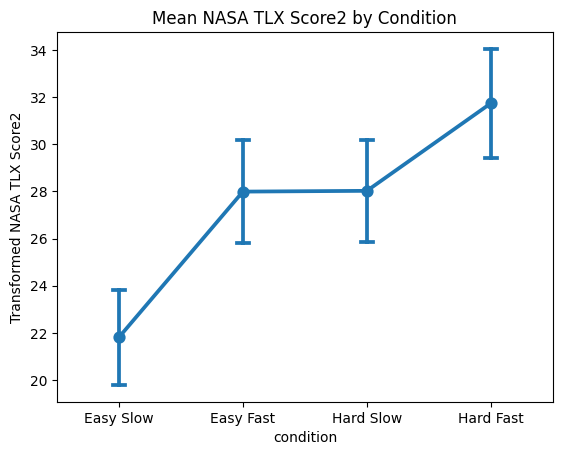

In [45]:
# Interaction plot with denormalized score
df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score2_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean NASA TLX Score2 by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
plt.ylabel('Transformed NASA TLX Score2')
plt.show()

##### Difficulty + Frequency (non-parametric)
Assumptions:
- At least ordinal

In [46]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score2'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score2')

# Rename columns for clarity
pivot_df.columns = ['EasySlow', 'HardSlow', 'EasyFast', 'HardFast']
pivot_df = pivot_df.reset_index()

In [47]:
# Friedman Chi Square test
result = friedmanchisquare(pivot_df['EasySlow'], pivot_df['HardSlow'], pivot_df['EasyFast'], pivot_df['HardFast'])
print(f"Friedman test statistic: {result.statistic}, p-value: {result.pvalue}")

Friedman test statistic: 11.502673796791434, p-value: 0.009296290981359338


--> Significant

In [48]:
# Post-hoc comparison test (wilcoxon signed-rank)
from scipy.stats import wilcoxon
import itertools

conditions = ['EasySlow', 'HardSlow', 'EasyFast', 'HardFast']
pairs = list(itertools.combinations(conditions, 2))
adjusted_alpha = .05 / len(pairs)

for pair in pairs:
    stat, p_value = wilcoxon(pivot_df[pair[0]], pivot_df[pair[1]])
    print(f"{pair[0]} vs {pair[1]}: p-value = {p_value} (adjusted alpha = {adjusted_alpha})")

EasySlow vs HardSlow: p-value = 0.00202178955078125 (adjusted alpha = 0.008333333333333333)
EasySlow vs EasyFast: p-value = 0.020898550347285695 (adjusted alpha = 0.008333333333333333)
EasySlow vs HardFast: p-value = 0.0033416748046875 (adjusted alpha = 0.008333333333333333)
HardSlow vs EasyFast: p-value = 0.9478654198040429 (adjusted alpha = 0.008333333333333333)
HardSlow vs HardFast: p-value = 0.07344971417890626 (adjusted alpha = 0.008333333333333333)
EasyFast vs HardFast: p-value = 0.09551239013671875 (adjusted alpha = 0.008333333333333333)


--> Significance between Easy_Slow & Hard_Slow and Easy_Slow & Hard_Fast

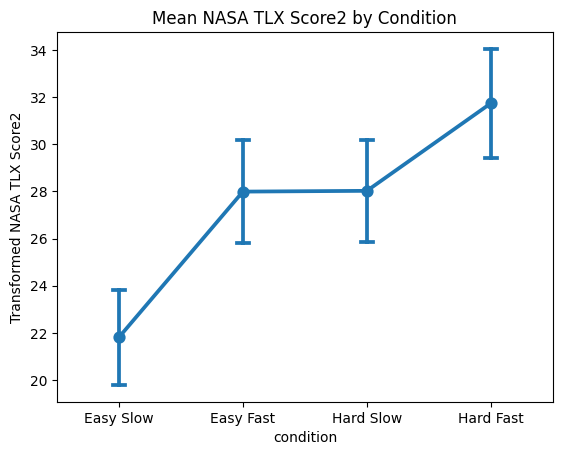

In [49]:
# Interaction plot with denormalized score
# df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score2', errorbar='se', markers='o', capsize=.1)
plt.title('Mean NASA TLX Score2 by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('Transformed NASA TLX Score2')
plt.show()

--> Although Hard_Fast seems to differ more from Easy_Slow compared to Easy_Fast, Easy_Slow & Easy_Fast has a smaller (and significant) p-value.   
        This is because the Wilcoxon test analyze the consistency of the difference of the measure within participants.

##### Difficulty
Assumption:
- Difference normality

In [50]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score2_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score2_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Easy', 'Hard']
pivot_df = pivot_df.reset_index()

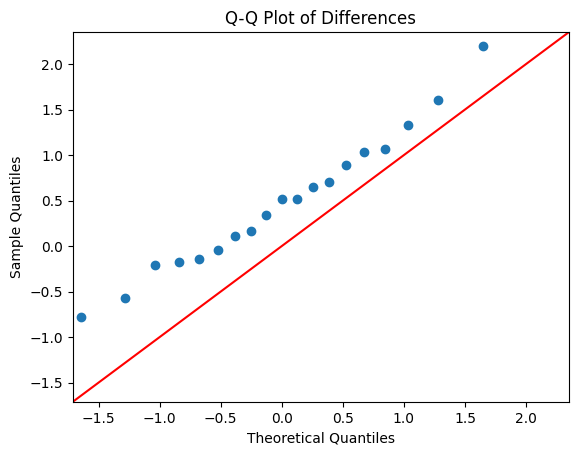

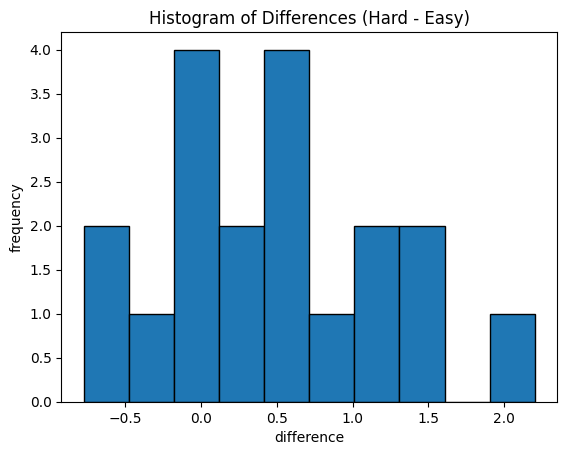

Shapiro-Wilk test p-value: 0.9473352264367781


In [51]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Hard'] - pivot_df['Easy']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Hard - Easy)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [52]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True)
print(paired_ttest_results)

               T  dof alternative    p-val           CI95%  cohen-d   BF10  \
T-test -2.787412   18   two-sided  0.01216  [-0.85, -0.12]  0.43708  4.424   

          power  
T-test  0.43789  


--> Not Significant

In [53]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative    p-val          CI95%  cohen-d   BF10  \
T-test -2.787412   18        less  0.00608  [-inf, -0.18]  0.43708  8.847   

          power  
T-test  0.57458  


--> Significant

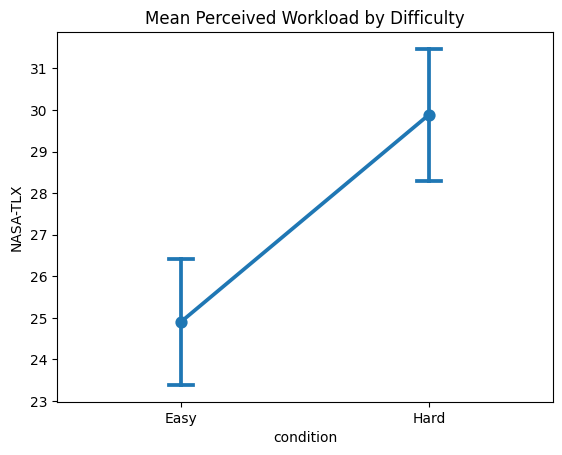

In [54]:
# Interaction plot with denormalized score
df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy', 'Hard']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score2_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Difficulty')
plt.xticks(ticks=[0, 1], labels=custom_labels)
plt.ylabel('NASA-TLX')
plt.show()

##### Frequency
Assumption:
- Difference normality

In [55]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 1,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score2_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score2_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Slow', 'Fast']
pivot_df = pivot_df.reset_index()

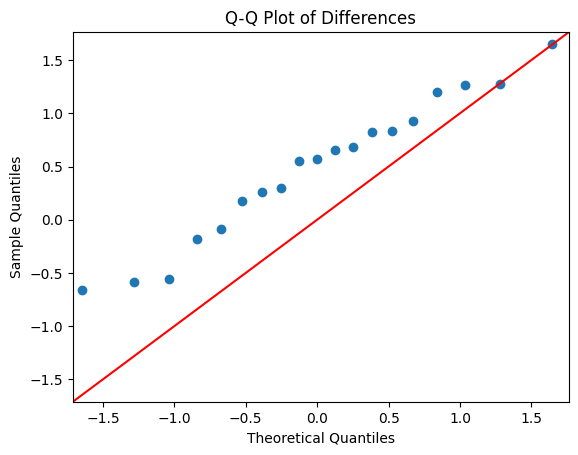

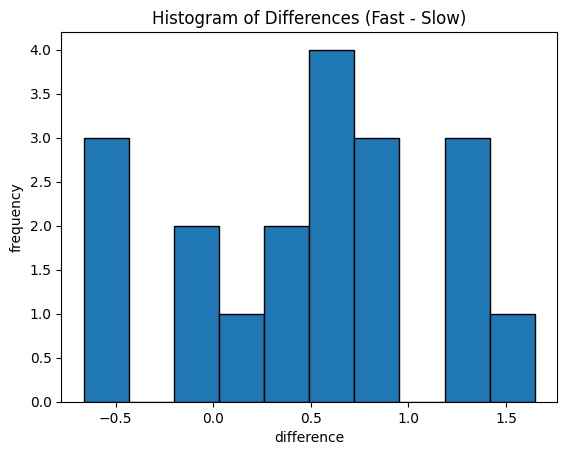

Shapiro-Wilk test p-value: 0.5953956733090096


In [56]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Fast'] - pivot_df['Slow']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Fast - Slow)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [57]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True)
print(paired_ttest_results)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -3.109964   18   two-sided  0.006046  [-0.8, -0.16]  0.436995  7.925   

           power  
T-test  0.437752  


--> Significant

In [58]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative     p-val          CI95%   cohen-d    BF10  \
T-test -3.109964   18        less  0.003023  [-inf, -0.21]  0.436995  15.851   

           power  
T-test  0.574441  


--> Significant

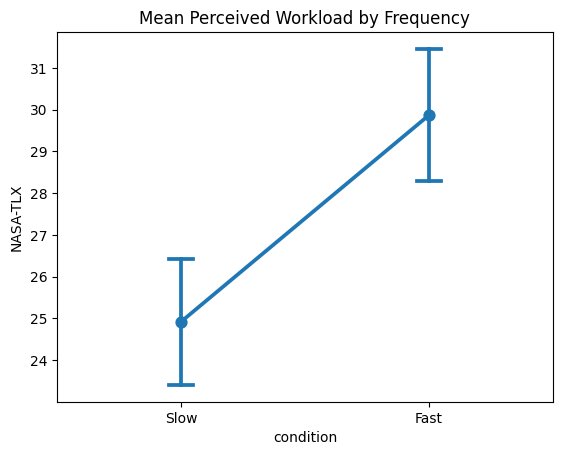

In [59]:
# Interaction plot with denormalized score
df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Slow', 'Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score2_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Frequency')
plt.xticks(ticks=[0, 1], labels=custom_labels)
plt.ylabel('NASA-TLX')
plt.show()

### 6. Repeated Measures ANOVA and Paired t-tests [only cognitive demand]

##### Difficulty + Frequency (parametric)
Assumptions:
- Normal distribution (continuous)
- Residual normality
- Homoscedasticity
- Sphericity

In [60]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

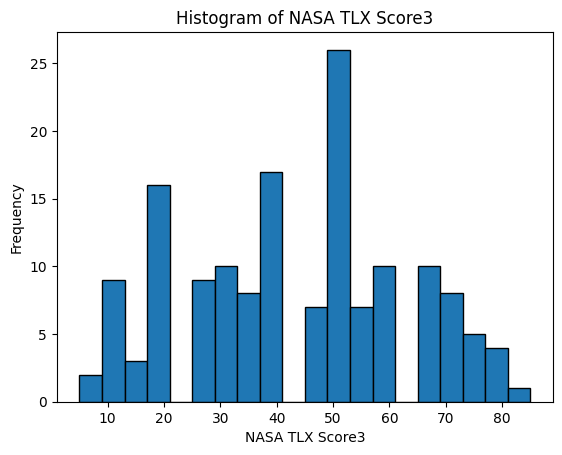

Shapiro-Wilk test p-value: 0.0035342518061127954


In [61]:
# Normlization test
plt.hist(df['NASA_TLX_Score3'], bins=20, edgecolor='black')
plt.title('Histogram of NASA TLX Score3')
plt.xlabel('NASA TLX Score3')
plt.ylabel('Frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score3'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

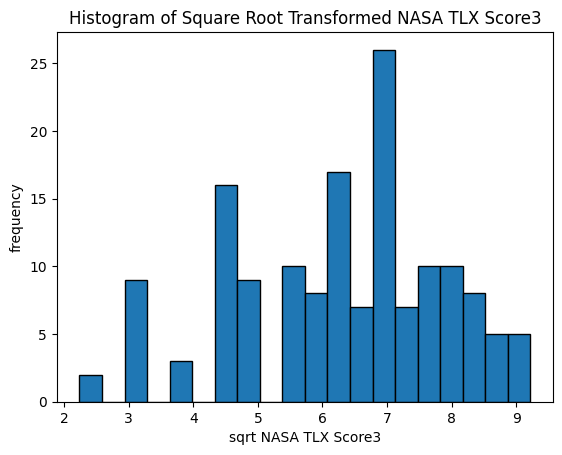

Shapiro-Wilk test p-value: 0.0001558267382566238


In [62]:
# Sqrt-normalization + test
df['NASA_TLX_Score3_sqrt'] = df['NASA_TLX_Score3'].apply(lambda x: np.sqrt(x))

# Re-run histogram to check distribution
plt.hist(df['NASA_TLX_Score3_sqrt'], bins=20, edgecolor='black')
plt.title('Histogram of Square Root Transformed NASA TLX Score3')
plt.xlabel('sqrt NASA TLX Score3')
plt.ylabel('frequency')
plt.show()

# Performing Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['NASA_TLX_Score3_sqrt'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Not Normal distributed

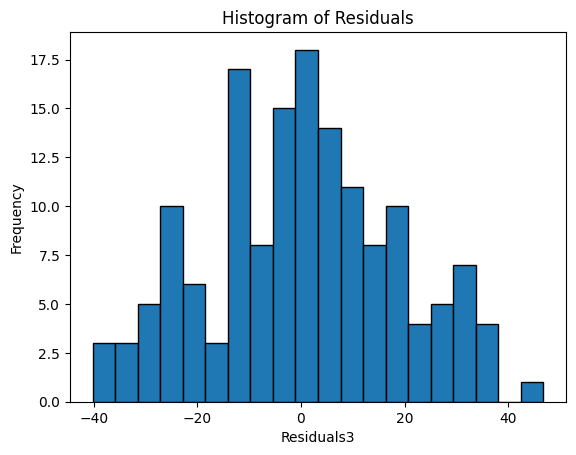

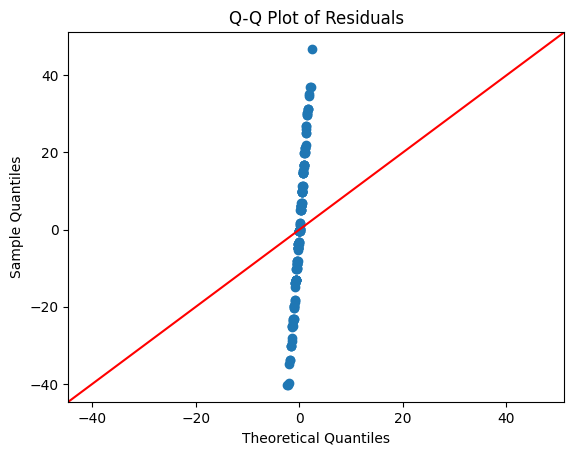

Shapiro-Wilk test p-value: 0.4882268843594373


In [63]:
# Check residuals normality
means = df.groupby('condition')['NASA_TLX_Score3'].transform('mean')
df['residuals3'] = df['NASA_TLX_Score3'] - means

# Plotting histogram of residuals
plt.hist(df['residuals3'], bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals3')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(df['residuals3'], line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform the Shapiro-Wilk test for normality of residuals
shapiro_test = stats.shapiro(df['residuals3'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [64]:
# Check homoscedasticity
from scipy.stats import levene

# Performing Levene’s test to check for homogeneity of variances
levene_test = levene(df[df['condition'] == 1]['NASA_TLX_Score3'],
                     df[df['condition'] == 2]['NASA_TLX_Score3'],
                     df[df['condition'] == 3]['NASA_TLX_Score3'],
                     df[df['condition'] == 4]['NASA_TLX_Score3'])
print(f'Levene test p-value: {levene_test.pvalue}')

Levene test p-value: 0.9632923104907709


--> Variance is homogeneous

In [65]:
# Check Sphericity
# Performing Mauchly's test for sphericity
mauchly_test = pg.sphericity(
    data=df, dv='NASA_TLX_Score3',
    subject='participant_id',
    within='condition')

# Print the sphericity test results
print(f"Mauchly's W statistic: {mauchly_test.W}")
print(f"Chi-square value: {mauchly_test.chi2}")
print(f"Degrees of freedom: {mauchly_test.dof}")
print(f"Mauchly's test p-value: {mauchly_test.pval}")

Mauchly's W statistic: 0.6304128753150607
Chi-square value: 7.7153041832556015
Degrees of freedom: 5
Mauchly's test p-value: 0.1732966660524608


--> ! No sphericity

Then, Anova with Greenhouse-Geisser (GG) correction

In [66]:
# RM ANOVA with spericity correction details
aov_results = pg.rm_anova(dv='NASA_TLX_Score3', within='condition', subject='participant_id', data=df, detailed=True)

# Display the ANOVA table with Greenhouse-Geisser correction
aov_results

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,condition,2921.710526,3,973.903509,12.150479,0.000003,0.126186,0.769973
1,Error,4328.289474,54,80.153509,NaN,NaN,NaN,NaN


--> significant

In [67]:
# Post-hoc comparisons (pairwise t-test)
posthoc_results = pg.pairwise_tests(dv='NASA_TLX_Score3', within='condition', subject='participant_id', data=df, padjust='bonf', alternative='less')
print(posthoc_results)

# Calculate Family Error rate
familyErr = 1 - ((1 - .05) ** 6) # .05 is alpha, 6 is the num of combinations
print(f"\nFamily Error rate: {familyErr}")

    Contrast  A  B  Paired  Parametric         T   dof alternative     p-unc  \
0  condition  1  2    True        True -4.552312  18.0        less  0.000123   
1  condition  1  3    True        True -3.326583  18.0        less  0.001877   
2  condition  1  4    True        True -4.546579  18.0        less  0.000125   
3  condition  2  3    True        True  0.411174  18.0        less  0.657100   
4  condition  2  4    True        True -2.162559  18.0        less  0.022141   
5  condition  3  4    True        True -2.470675  18.0        less  0.011854   

     p-corr p-adjust     BF10    hedges  
0  0.000741     bonf  251.652 -0.662570  
1  0.011263     bonf    23.72 -0.610530  
2  0.000750     bonf  248.865 -0.942755  
3  1.000000     bonf    0.513  0.065642  
4  0.132849     bonf    3.113 -0.321473  
5  0.071123     bonf    5.124 -0.389524  

Family Error rate: 0.2649081093750002


--> Significance between Easy_Slow & Hard_Slow, Easy_Slow & Easy_Fast, and Easy_Slow & Hard_Fast

In [68]:
# Post-hoc comparisons (Turkey HSD Method)
tukey_results = pairwise_tukeyhsd(endog=df['NASA_TLX_Score3'], groups=df['condition'], alpha=0.05)
tukey_summary_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
print(tukey_summary_df)

   group1  group2  meandiff   p-adj    lower    upper  reject
0       1       2   11.7105  0.0340   0.6266  22.7944    True
1       1       3   10.6579  0.0643  -0.4260  21.7418   False
2       1       4   17.1053  0.0006   6.0214  28.1892    True
3       2       3   -1.0526  0.9947 -12.1365  10.0313   False
4       2       4    5.3947  0.5868  -5.6892  16.4786   False
5       3       4    6.4474  0.4332  -4.6365  17.5313   False


--> Significance between Easy_Slow & Hard_Fast

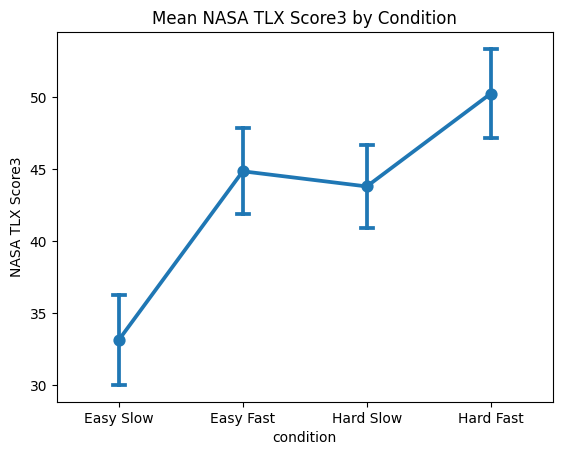

In [69]:
# # Interaction plot with denormalized score
# df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score3', errorbar='se', markers='o', capsize=.1)
plt.title('Mean NASA TLX Score3 by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA TLX Score3')
plt.show()

##### Difficulty + Frequency (non-parametric)
Assumptions:
- At least ordinal

In [70]:
# Setup
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score3'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score3')

# Rename columns for clarity
pivot_df.columns = ['EasySlow', 'HardSlow', 'EasyFast', 'HardFast']
pivot_df = pivot_df.reset_index()

In [71]:
# Friedman Chi Square test
result = friedmanchisquare(pivot_df['EasySlow'], pivot_df['HardSlow'], pivot_df['EasyFast'], pivot_df['HardFast'])
print(f"Friedman test statistic: {result.statistic}, p-value: {result.pvalue}")

Friedman test statistic: 17.18023255813957, p-value: 0.0006489096923089577


--> Significant

In [72]:
# Post-hoc comparison test (wilcoxon signed-rank)
from scipy.stats import wilcoxon
import itertools

conditions = ['EasySlow', 'HardSlow', 'EasyFast', 'HardFast']
pairs = list(itertools.combinations(conditions, 2))
adjusted_alpha = .05 / len(pairs)

for pair in pairs:
    stat, p_value = wilcoxon(pivot_df[pair[0]], pivot_df[pair[1]])
    print(f"{pair[0]} vs {pair[1]}: p-value = {p_value} (adjusted alpha = {adjusted_alpha})")

EasySlow vs HardSlow: p-value = 0.0006243922133223435 (adjusted alpha = 0.008333333333333333)
EasySlow vs EasyFast: p-value = 0.005539793244892258 (adjusted alpha = 0.008333333333333333)
EasySlow vs HardFast: p-value = 0.0011980568585875221 (adjusted alpha = 0.008333333333333333)
HardSlow vs EasyFast: p-value = 0.7266025232210909 (adjusted alpha = 0.008333333333333333)
HardSlow vs HardFast: p-value = 0.07568369512446717 (adjusted alpha = 0.008333333333333333)
EasyFast vs HardFast: p-value = 0.030506587992811505 (adjusted alpha = 0.008333333333333333)


--> Significance between Easy_Slow & Hard_Slow, Easy_Slow & Hard_Fast

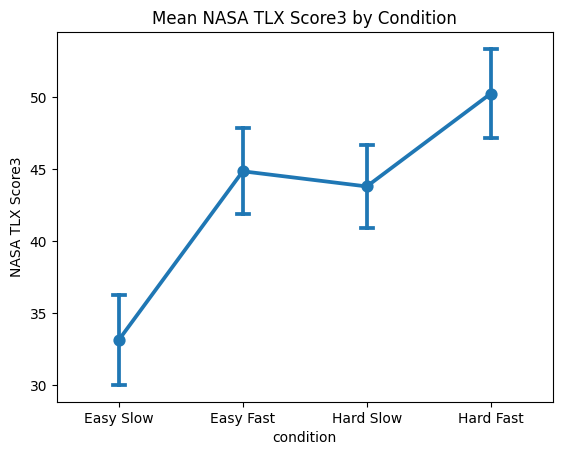

In [73]:
# # Interaction plot with denormalized score
# df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy Slow', 'Easy Fast', 'Hard Slow', 'Hard Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score3', errorbar='se', markers='o', capsize=.1)
plt.title('Mean NASA TLX Score3 by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA TLX Score3')
plt.show()

##### Difficulty
Assumption:
- Difference normality

In [74]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score3'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score3')

# Rename columns for clarity
pivot_df.columns = ['Easy', 'Hard']
pivot_df = pivot_df.reset_index()

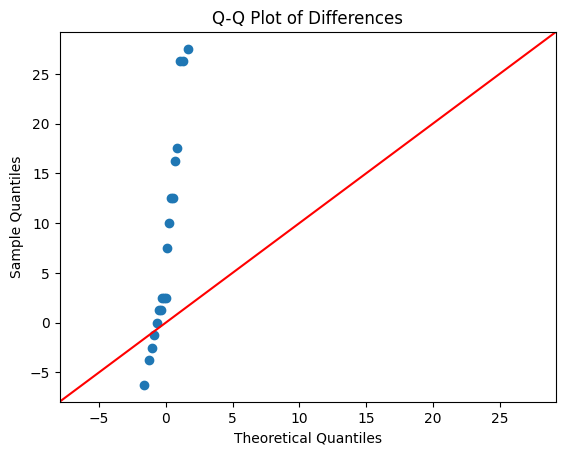

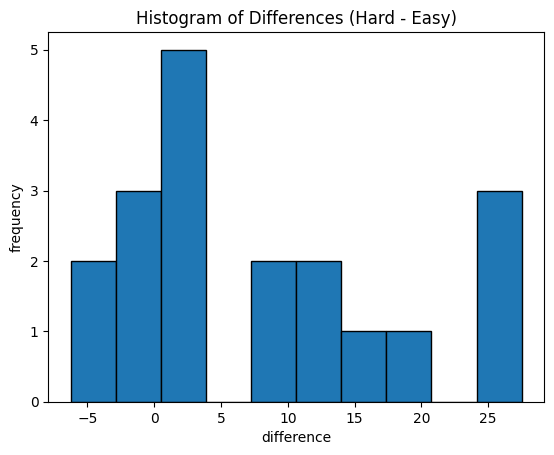

Shapiro-Wilk test p-value: 0.06122171844622863


In [75]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Hard'] - pivot_df['Easy']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Hard - Easy)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [76]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True)
print(paired_ttest_results)

               T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.292624   18   two-sided  0.004047  [-13.15, -2.9]  0.508531  11.128   

           power  
T-test  0.554767  


--> Significant

In [77]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test -3.292624   18        less  0.002023  [-inf, -3.8]  0.508531  22.256   

           power  
T-test  0.686974  


--> Significant

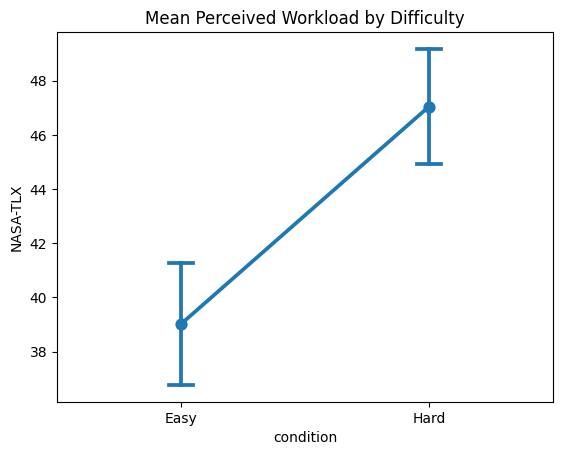

In [78]:
# Interaction plot with denormalized score
# df['NASA_TLX_Score2_original'] = df['NASA_TLX_Score2_sqrt'] ** 2
custom_labels = ['Easy', 'Hard']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score3', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Difficulty')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

##### Frequency
Assumption:
- Difference normality

In [79]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 1,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score3'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score3')

# Rename columns for clarity
pivot_df.columns = ['Slow', 'Fast']
pivot_df = pivot_df.reset_index()

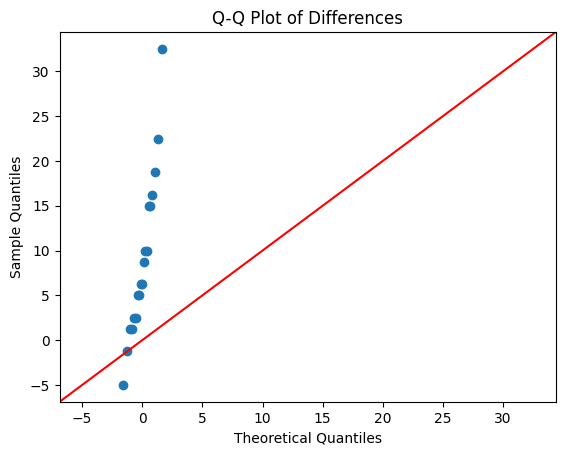

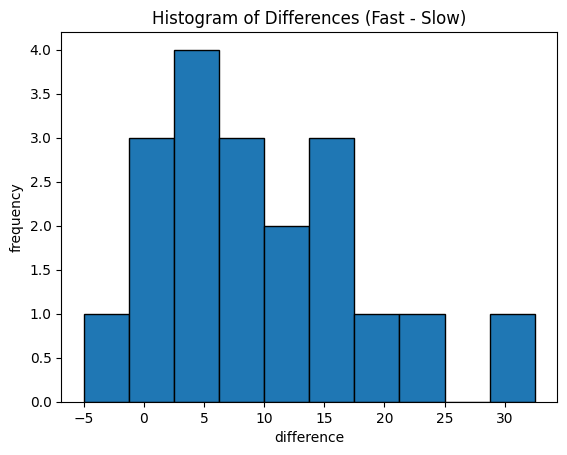

Shapiro-Wilk test p-value: 0.32561380839044884


In [80]:
# Check Normality of Differences
pivot_df['Difference'] = pivot_df['Fast'] - pivot_df['Slow']

# Q-Q Plot of Differences
sm.qqplot(pivot_df['Difference'], line='45')
plt.title('Q-Q Plot of Differences')
plt.show()

# Histogram of Differences
plt.hist(pivot_df['Difference'], bins=10, edgecolor='black')
plt.title('Histogram of Differences (Fast - Slow)')
plt.xlabel('difference')
plt.ylabel('frequency')
plt.show()

shapiro_test = stats.shapiro(pivot_df['Difference'])
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')

--> Normal distributed

In [81]:
# Paired t-test
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True)
print(paired_ttest_results)

              T  dof alternative    p-val            CI95%   cohen-d    BF10  \
T-test -4.32236   18   two-sided  0.00041  [-13.49, -4.67]  0.583804  80.476   

           power  
T-test  0.672706  


--> Significant

In [82]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True, alternative='less')
print(paired_ttest_results)

              T  dof alternative     p-val          CI95%   cohen-d     BF10  \
T-test -4.32236   18        less  0.000205  [-inf, -5.44]  0.583804  160.952   

           power  
T-test  0.788847  


--> Significant

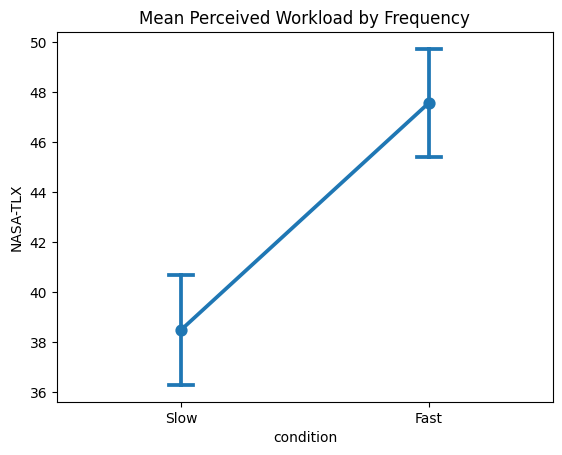

In [83]:
# Interaction plot with denormalized score
df['NASA_TLX_Score3_original'] = df['NASA_TLX_Score3_sqrt'] ** 2
custom_labels = ['Slow', 'Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score3_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Frequency')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

### 7. Factorial Repeated Measures ANOVA
Assumptions:
- Normality (not met)
- Homoscedasticity
- Sphericity (only if +2 levels per factor)

##### Overall NASA-TLX_Score

In [84]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)

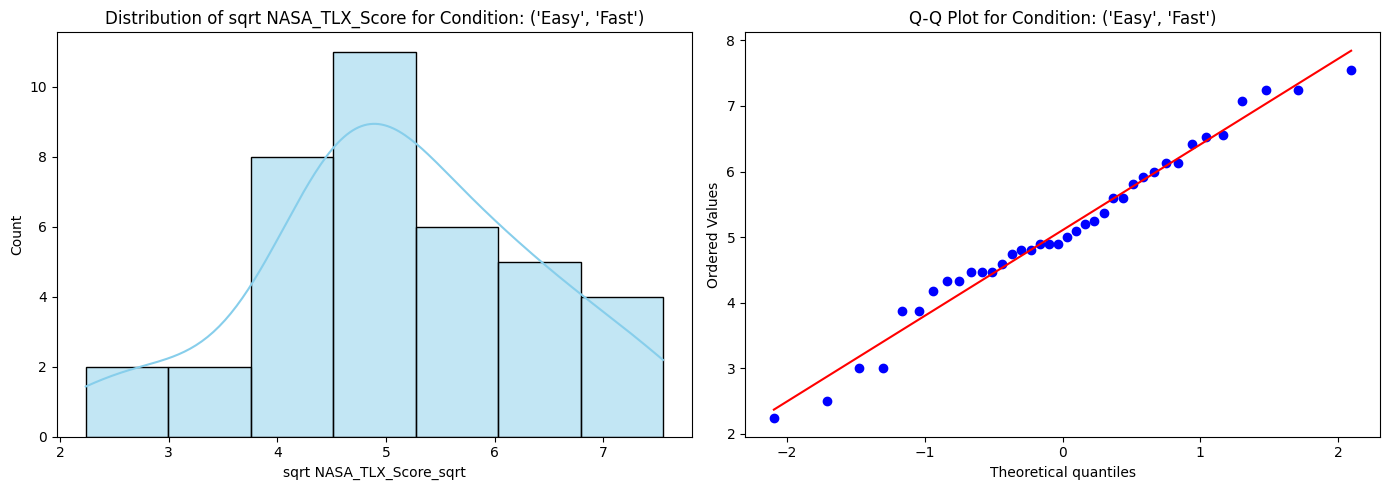

Condition ('Easy', 'Fast'): Shapiro-Wilk test p-value = 0.6157872803167062


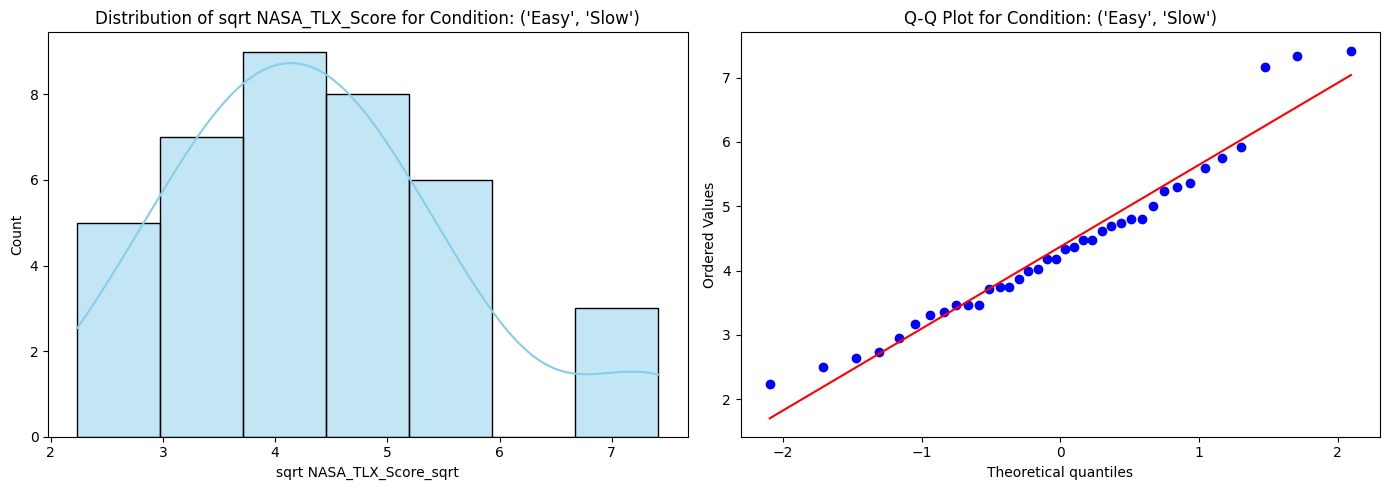

Condition ('Easy', 'Slow'): Shapiro-Wilk test p-value = 0.10605671529284305


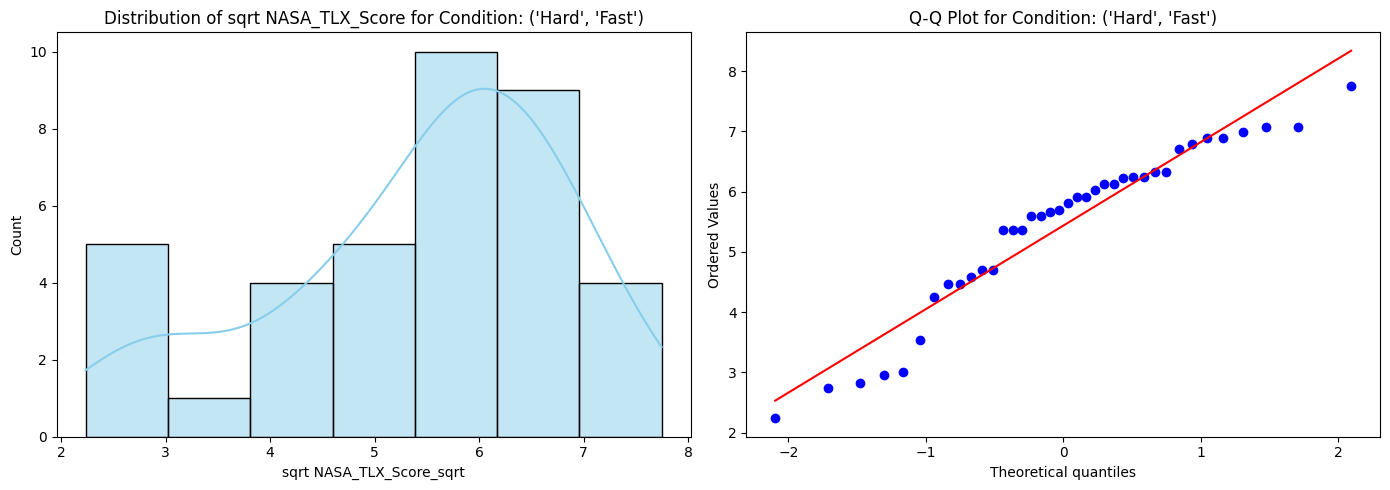

Condition ('Hard', 'Fast'): Shapiro-Wilk test p-value = 0.016677986798006524


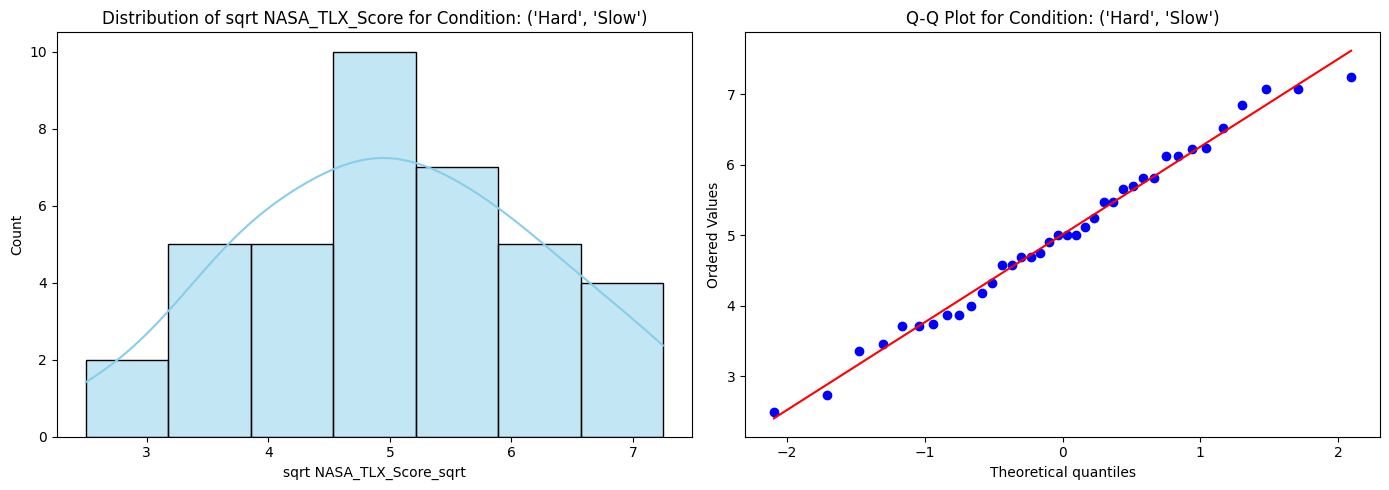

Condition ('Hard', 'Slow'): Shapiro-Wilk test p-value = 0.7870895567838498


In [85]:
# Check Normality
for condition, group in df.groupby(['difficulty', 'frequency']):
    # Set up the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution plot
    sns.histplot(group['NASA_TLX_Score_sqrt'], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of sqrt NASA_TLX_Score for Condition: {condition}')
    axes[0].set_xlabel('sqrt NASA_TLX_Score_sqrt')
    
    # Q-Q plot
    stats.probplot(group['NASA_TLX_Score_sqrt'], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot for Condition: {condition}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(group['NASA_TLX_Score_sqrt'])
    print(f"Condition {condition}: Shapiro-Wilk test p-value = {p}")

--> Not normal distributed

In [86]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.36800228955256553
Levene's test for frequency levels: p-value = 0.27776771610980383
Levene's test across all combinations: p-value = 0.6875900622936231


In [87]:
# Factorial RM ANOVA
anova_model = AnovaRM(df, 'NASA_TLX_Score', 'participant_id', within=['difficulty', 'frequency'], aggregate_func='mean').fit()
print(anova_model.summary())

                      Anova
                     F Value Num DF  Den DF Pr > F
--------------------------------------------------
difficulty            9.5284 1.0000 18.0000 0.0064
frequency            14.0204 1.0000 18.0000 0.0015
difficulty:frequency  0.6395 1.0000 18.0000 0.4343



##### Overall NASA-TLX_Score [no temporal demand]

In [88]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)

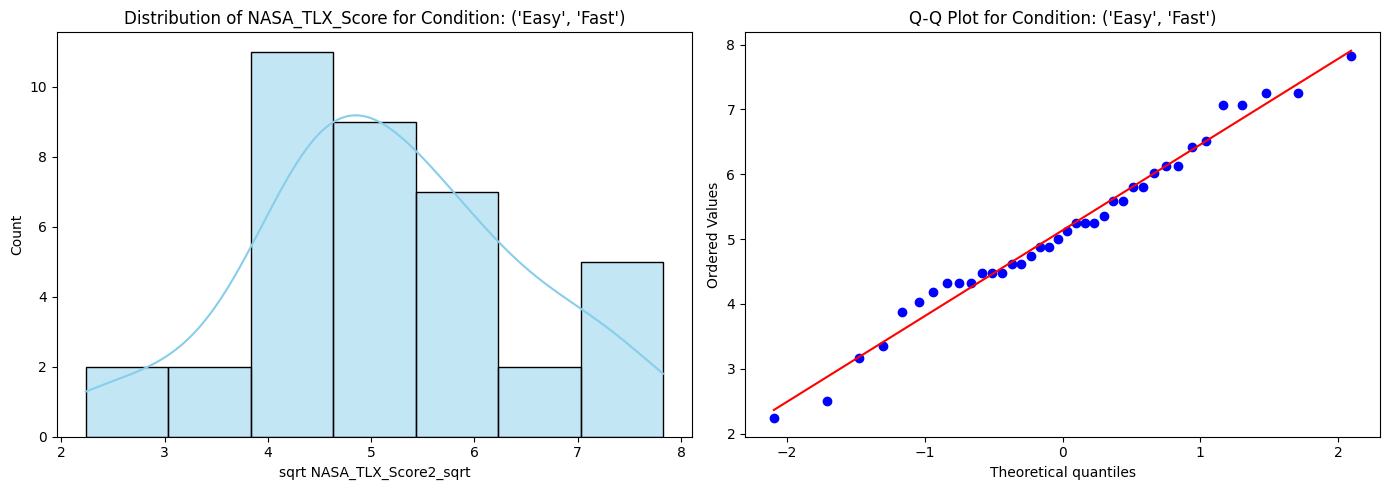

Condition ('Easy', 'Fast'): Shapiro-Wilk test p-value = 0.8016616076108423


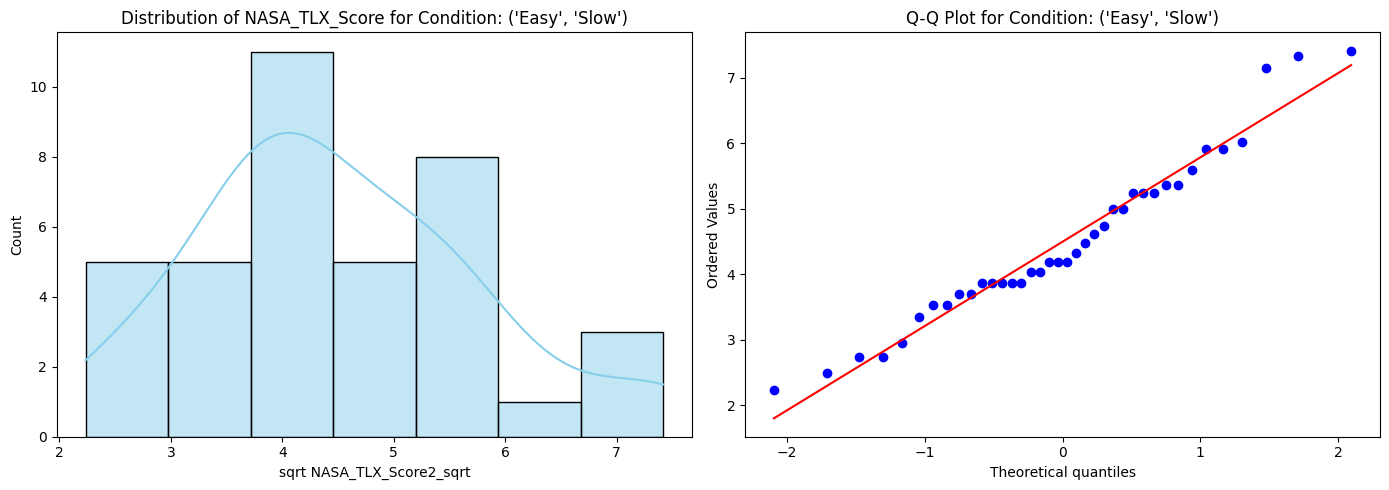

Condition ('Easy', 'Slow'): Shapiro-Wilk test p-value = 0.17794447334043073


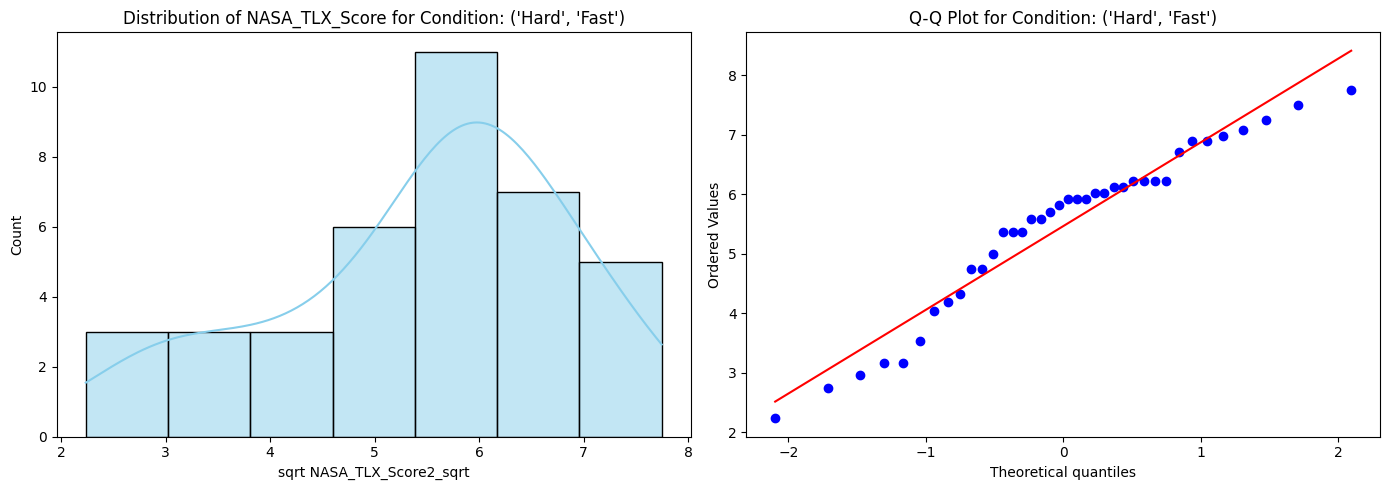

Condition ('Hard', 'Fast'): Shapiro-Wilk test p-value = 0.045784423660715536


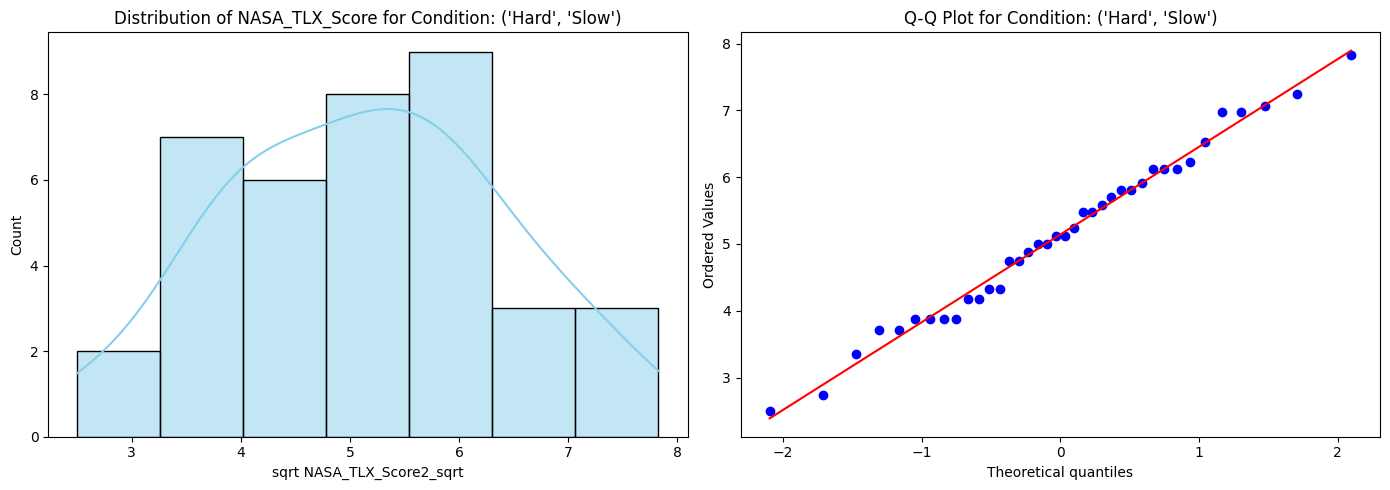

Condition ('Hard', 'Slow'): Shapiro-Wilk test p-value = 0.8923081520719338


In [89]:
# Check Normality
df['NASA_TLX_Score2_sqrt'] = df['NASA_TLX_Score2'].apply(lambda x: np.sqrt(x))

for condition, group in df.groupby(['difficulty', 'frequency']):
    # Set up the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution plot
    sns.histplot(group['NASA_TLX_Score2_sqrt'], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of NASA_TLX_Score for Condition: {condition}')
    axes[0].set_xlabel('sqrt NASA_TLX_Score2_sqrt')
    
    # Q-Q plot
    stats.probplot(group['NASA_TLX_Score2_sqrt'], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot for Condition: {condition}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(group['NASA_TLX_Score2_sqrt'])
    print(f"Condition {condition}: Shapiro-Wilk test p-value = {p}")

--> Not normal distributed

In [90]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score2'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score2'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score2'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score2'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score2'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.4183300945546399
Levene's test for frequency levels: p-value = 0.5420303669403943
Levene's test across all combinations: p-value = 0.7731139556446581


In [91]:
# Factorial RM ANOVA
anova_model = AnovaRM(df, 'NASA_TLX_Score2', 'participant_id', within=['difficulty', 'frequency'], aggregate_func='mean').fit()
print(anova_model.summary())

                      Anova
                     F Value Num DF  Den DF Pr > F
--------------------------------------------------
difficulty            8.2186 1.0000 18.0000 0.0103
frequency             8.1138 1.0000 18.0000 0.0107
difficulty:frequency  0.7532 1.0000 18.0000 0.3969



##### Cognitive Demand

In [92]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)

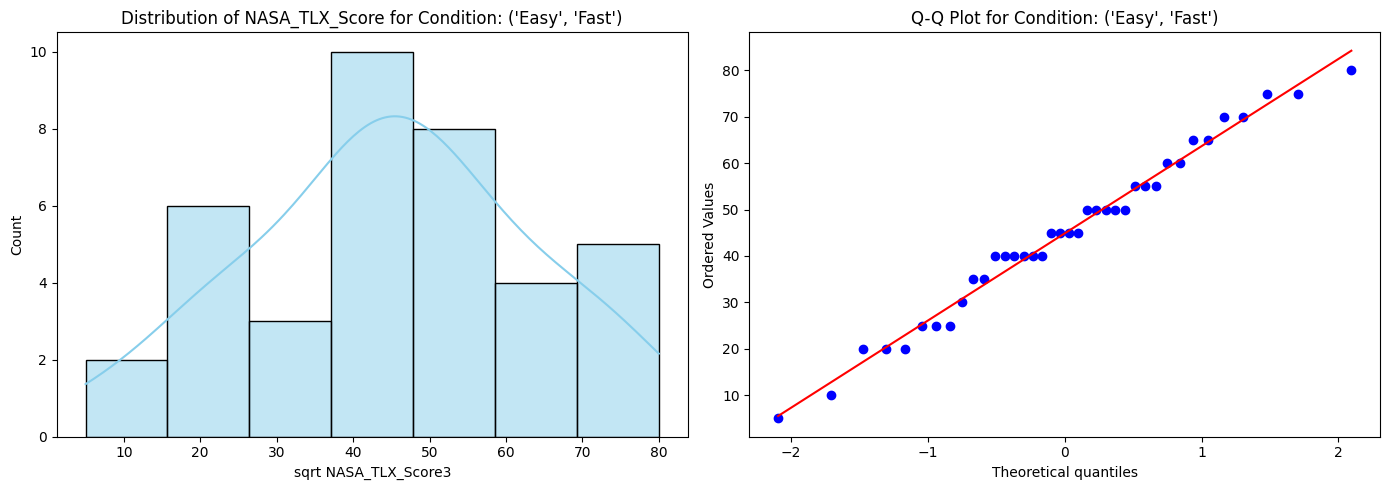

Condition ('Easy', 'Fast'): Shapiro-Wilk test p-value = 0.7425477946575149


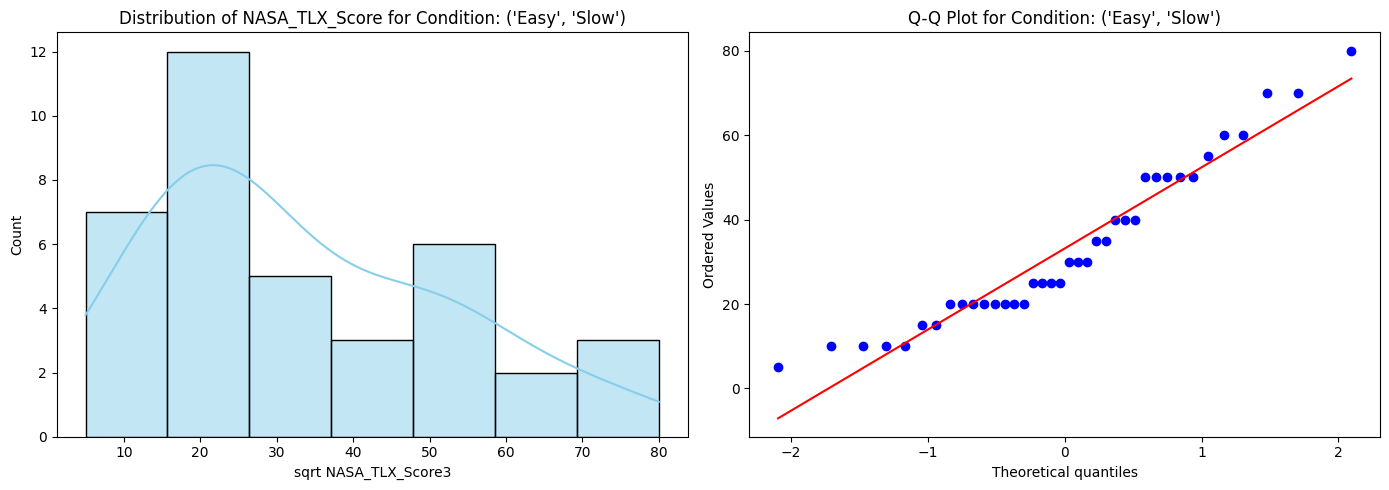

Condition ('Easy', 'Slow'): Shapiro-Wilk test p-value = 0.019334717144470607


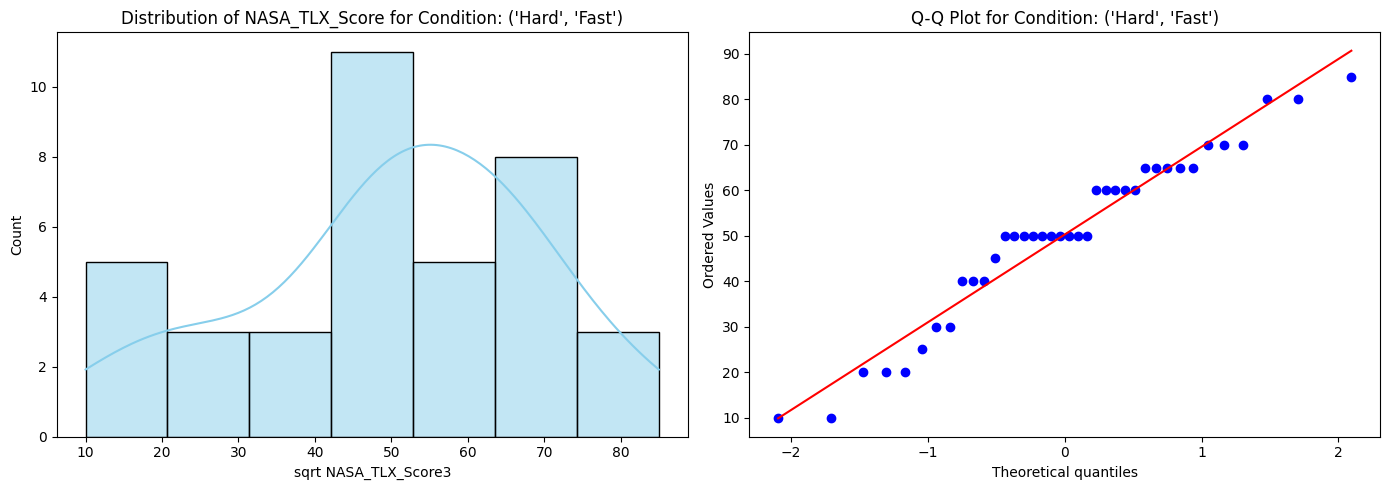

Condition ('Hard', 'Fast'): Shapiro-Wilk test p-value = 0.0910982870965286


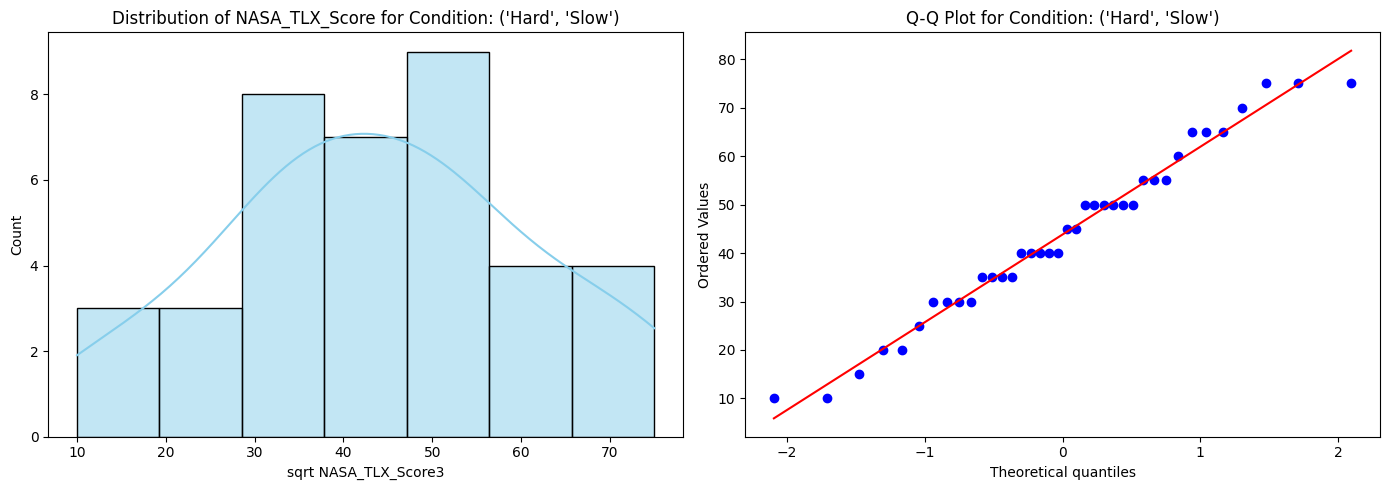

Condition ('Hard', 'Slow'): Shapiro-Wilk test p-value = 0.4344408288943603


In [93]:
# Check Normality
for condition, group in df.groupby(['difficulty', 'frequency']):
    # Set up the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution plot
    sns.histplot(group['NASA_TLX_Score3'], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of NASA_TLX_Score for Condition: {condition}')
    axes[0].set_xlabel('sqrt NASA_TLX_Score3')
    
    # Q-Q plot
    stats.probplot(group['NASA_TLX_Score3'], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot for Condition: {condition}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(group['NASA_TLX_Score3'])
    print(f"Condition {condition}: Shapiro-Wilk test p-value = {p}")

--> Not normal distributed

In [94]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score3'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score3'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score3'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score3'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score3'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.38692857460992225
Levene's test for frequency levels: p-value = 0.46771911060877336
Levene's test across all combinations: p-value = 0.9632923104907709


In [95]:
# Factorial RM ANOVA
anova_model = AnovaRM(df, 'NASA_TLX_Score3', 'participant_id', within=['difficulty', 'frequency'], aggregate_func='mean').fit()
print(anova_model.summary())

                      Anova
                     F Value Num DF  Den DF Pr > F
--------------------------------------------------
difficulty           10.8414 1.0000 18.0000 0.0040
frequency            18.6828 1.0000 18.0000 0.0004
difficulty:frequency  3.0088 1.0000 18.0000 0.0999



### 8. Aligned Rank Transform ANOVA (non-parametric)
Assumptions:
- Homoscedasticity

In [96]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['Easy', 'Hard'])
df['frequency'] = pd.Categorical(df['frequency'], categories=['Slow', 'Fast'])

In [97]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.36800228955256553
Levene's test for frequency levels: p-value = 0.27776771610980383
Levene's test across all combinations: p-value = 0.6875900622936231


--> Variances are Homogeneous

--> Only available in R

In [98]:
# ART Results
print("Aligned Rank Transform of Factorial Model")
print("\nCall:")
print("art(formula = NASA_TLX_Score ~ difficulty * frequency + (1 |")
print("\tparticipant_id), data = df)")
print("\nColumn sums of aligned responses (should all be ~0):")
print("\t\t  difficulty            frequency difficulty:frequency ")
print("\t\t\t   0                    0                    0")
print("\nF values of ANOVAs on aligned responses not of interest (should all be ~0):")
print("|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |")
print("|     0 |       0 |       0 |       0 |       0 |       0 |")

Aligned Rank Transform of Factorial Model

Call:
art(formula = NASA_TLX_Score ~ difficulty * frequency + (1 |
	participant_id), data = df)

Column sums of aligned responses (should all be ~0):
		  difficulty            frequency difficulty:frequency 
			   0                    0                    0

F values of ANOVAs on aligned responses not of interest (should all be ~0):
|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |
|     0 |       0 |       0 |       0 |       0 |       0 |


In [99]:
# ANOVA Results (from R) 
print("Analysis of Variance of Aligned Rank Transformed Data")
print("\nTable Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)")
print("Model: Mixed Effects (lmer)")
print("Response: art(NASA_TLX_Score)")
print("\n| Effect                 | F-value  | df   | df.residual | Pr(>F)   |")
print("|------------------------|----------|------|-------------|----------|")
print("| Difficulty             | 10.318   | 1    | 130         | 7.03e-05 | ***")
print("| Frequency              | 20.904   | 1    | 130         | 8.60e-06 | ***")
print("| Difficulty:Frequency   |  0.005   | 1    | 130         | 0.59017  | ")
print("---")
print("Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)
Model: Mixed Effects (lmer)
Response: art(NASA_TLX_Score)

| Effect                 | F-value  | df   | df.residual | Pr(>F)   |
|------------------------|----------|------|-------------|----------|
| Difficulty             | 10.318   | 1    | 130         | 7.03e-05 | ***
| Frequency              | 20.904   | 1    | 130         | 8.60e-06 | ***
| Difficulty:Frequency   |  0.005   | 1    | 130         | 0.59017  | 
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


--> Difficulty is significant  
--> Frequency is significant  
--> No interaction effects

In [100]:
# Post-hoc Comparisons (from R)
# difficulty
print("= Main Effect of Difficulty =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Easy vs Hard  | -18.7    | 4.56 | 130 | -4.108  | 0.0001  |")
print("\nResults are averaged over the levels of: frequency")
print("Degrees-of-freedom method: kenward-roger")

# frequency
print("\n\n= Main Effect of Frequency =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Slow vs Fast  | -21.5    | 4.64 | 130 | -4.634  | <.0001 |")
print("\nResults are averaged over the levels of: difficulty")
print("Degrees-of-freedom method: kenward-roger")

# interaction
print("\n\n= Interaction Effect (Difficulty × Frequency) =")
print("| Contrast                | Estimate | SE   | df  | t.ratio | p.value |")
print("|-------------------------|----------|------|-----|---------|---------|")
print("| Easy,Fast vs Easy,Slow  |  26.08   | 6.31 | 130 |  4.131  | 0.0004  |")
print("| Easy,Fast vs Hard,Fast  | -12.00   | 6.31 | 130 | -1.901  | 0.2328  |")
print("| Easy,Fast vs Hard,Slow  |   3.71   | 6.31 | 130 |  0.588  | 0.9356  |")
print("| Easy,Slow vs Hard,Fast  | -38.08   | 6.31 | 130 | -6.032  | <.0001  |")
print("| Easy,Slow vs Hard,Slow  | -22.37   | 6.31 | 130 | -3.543  | 0.0031  |")
print("| Hard,Fast vs Hard,Slow  |  15.71   | 6.31 | 130 |  2.489  | 0.0664  |")
print("\nDegrees-of-freedom method: kenward-roger")
print("P value adjustment: tukey method for comparing a family of 4 estimates")

= Main Effect of Difficulty =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Easy vs Hard  | -18.7    | 4.56 | 130 | -4.108  | 0.0001  |

Results are averaged over the levels of: frequency
Degrees-of-freedom method: kenward-roger


= Main Effect of Frequency =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Slow vs Fast  | -21.5    | 4.64 | 130 | -4.634  | <.0001 |

Results are averaged over the levels of: difficulty
Degrees-of-freedom method: kenward-roger


= Interaction Effect (Difficulty × Frequency) =
| Contrast                | Estimate | SE   | df  | t.ratio | p.value |
|-------------------------|----------|------|-----|---------|---------|
| Easy,Fast vs Easy,Slow  |  26.08   | 6.31 | 130 |  

--> Significance in:  
    - EasySlow vs HardFast  
    - EasySlow vs EasyFast  
    - HardSlow vs HardFast

--> !!! Not really relevant since the global interaction is not significant

### 9. Aligned Rank Transform ANOVA (non-parametric) [no temporal demand]
Assumptions:
- Homoscedasticity

In [101]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['Easy', 'Hard'])
df['frequency'] = pd.Categorical(df['frequency'], categories=['Slow', 'Fast'])

In [102]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score2'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score2'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score2'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score2'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score2'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score2'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.4183300945546399
Levene's test for frequency levels: p-value = 0.5420303669403943
Levene's test across all combinations: p-value = 0.7731139556446581


--> Variances are Homogeneous

--> Only available in R

In [103]:
# ART Results
print("Aligned Rank Transform of Factorial Model")
print("\nCall:")
print("art(formula = NASA_TLX_Score2 ~ difficulty * frequency + (1 |")
print("\tparticipant_id), data = df)")
print("\nColumn sums of aligned responses (should all be ~0):")
print("\t\t  difficulty            frequency difficulty:frequency ")
print("\t\t\t   0                    0                    0")
print("\nF values of ANOVAs on aligned responses not of interest (should all be ~0):")
print("|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |")
print("|     0 |       0 |       0 |       0 |       0 |       0 |")

Aligned Rank Transform of Factorial Model

Call:
art(formula = NASA_TLX_Score2 ~ difficulty * frequency + (1 |
	participant_id), data = df)

Column sums of aligned responses (should all be ~0):
		  difficulty            frequency difficulty:frequency 
			   0                    0                    0

F values of ANOVAs on aligned responses not of interest (should all be ~0):
|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |
|     0 |       0 |       0 |       0 |       0 |       0 |


In [104]:
# ANOVA Results (from R) 
print("Analysis of Variance of Aligned Rank Transformed Data")
print("\nTable Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)")
print("Model: Mixed Effects (lmer)")
print("Response: art(NASA_TLX_Score2)")
print("\n| Effect                 | F-value  | df   | df.residual | Pr(>F)   |")
print("|------------------------|----------|------|-------------|----------|")
print("| Difficulty             | 14.572   | 1    | 130         | 0.000208 | ***")
print("| Frequency              | 14.007   | 1    | 130         | 0.000272 | ***")
print("| Difficulty:Frequency   |  0.388   | 1    | 130         | 0.534587 | ")
print("---")
print("Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)
Model: Mixed Effects (lmer)
Response: art(NASA_TLX_Score2)

| Effect                 | F-value  | df   | df.residual | Pr(>F)   |
|------------------------|----------|------|-------------|----------|
| Difficulty             | 14.572   | 1    | 130         | 0.000208 | ***
| Frequency              | 14.007   | 1    | 130         | 0.000272 | ***
| Difficulty:Frequency   |  0.388   | 1    | 130         | 0.534587 | 
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


--> Difficulty is significant  
--> Frequency is significant  
--> No interaction effects

In [105]:
# Post-hoc Comparisons (from R)
# difficulty
print("= Main Effect of Difficulty =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Easy vs Hard  | -17.6    | 4.62 | 130 | -3.817  | 0.0002  |")
print("\nResults are averaged over the levels of: frequency")
print("Degrees-of-freedom method: kenward-roger")

# frequency
print("\n\n= Main Effect of Frequency =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Slow vs Fast  | -17.6    | 4.71 | 130 | -3.743  | <0.0003 |")
print("\nResults are averaged over the levels of: difficulty")
print("Degrees-of-freedom method: kenward-roger")

# interaction
print("\n\n= Interaction Effect (Difficulty × Frequency) =")
print("| Contrast                | Estimate | SE   | df  | t.ratio | p.value |")
print("|-------------------------|----------|------|-----|---------|---------|")
print("| Easy,Fast vs Easy,Slow  |  22.17   | 6.41 | 130 |  3.460  | 0.0040  |")
print("| Easy,Fast vs Hard,Fast  | -12.66   | 6.41 | 130 | -1.975  | 0.2027  |")
print("| Easy,Fast vs Hard,Slow  |   0.43   | 6.41 | 130 |  0.068  | 0.9999  |")
print("| Easy,Slow vs Hard,Fast  | -34.83   | 6.41 | 130 | -5.435  | <.0001  |")
print("| Easy,Slow vs Hard,Slow  | -21.74   | 6.41 | 130 | -3.392  | 0.0050  |")
print("| Hard,Fast vs Hard,Slow  |  13.09   | 6.41 | 130 |  2.043  | 0.1778  |")
print("\nDegrees-of-freedom method: kenward-roger")
print("P value adjustment: tukey method for comparing a family of 4 estimates")

= Main Effect of Difficulty =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Easy vs Hard  | -17.6    | 4.62 | 130 | -3.817  | 0.0002  |

Results are averaged over the levels of: frequency
Degrees-of-freedom method: kenward-roger


= Main Effect of Frequency =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Slow vs Fast  | -17.6    | 4.71 | 130 | -3.743  | <0.0003 |

Results are averaged over the levels of: difficulty
Degrees-of-freedom method: kenward-roger


= Interaction Effect (Difficulty × Frequency) =
| Contrast                | Estimate | SE   | df  | t.ratio | p.value |
|-------------------------|----------|------|-----|---------|---------|
| Easy,Fast vs Easy,Slow  |  22.17   | 6.41 | 130 | 

--> Significance in:  
    - EasySlow vs HardFast  
    - EasySlow vs EasyFast  

--> !!! Not really relevant since the global interaction is not significant

### 10. Aligned Rank Transform ANOVA (non-parametric) [cognitive demand]
Assumptions:
- Homoscedasticity

In [106]:
# Setup 
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['Easy', 'Hard'])
df['frequency'] = pd.Categorical(df['frequency'], categories=['Slow', 'Fast'])

In [107]:
# Check Homoscedasticity
# Across difficulty levels
stat, p = levene(df[df['difficulty'] == 'Easy']['NASA_TLX_Score3'],
                 df[df['difficulty'] == 'Hard']['NASA_TLX_Score3'])
print(f"Levene's test for difficulty levels: p-value = {p}")

# Across frequency levels
stat, p = levene(df[df['frequency'] == 'Slow']['NASA_TLX_Score3'],
                 df[df['frequency'] == 'Fast']['NASA_TLX_Score3'])
print(f"Levene's test for frequency levels: p-value = {p}")

# Combinations of factors
stat, p = levene(df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Slow')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Easy') & (df['frequency'] == 'Fast')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Slow')]['NASA_TLX_Score3'],
                 df[(df['difficulty'] == 'Hard') & (df['frequency'] == 'Fast')]['NASA_TLX_Score3'])
print(f"Levene's test across all combinations: p-value = {p}")

Levene's test for difficulty levels: p-value = 0.38692857460992225
Levene's test for frequency levels: p-value = 0.46771911060877336
Levene's test across all combinations: p-value = 0.9632923104907709


--> variances are Homogeneous

--> Only available in R

In [108]:
# ART Results
print("Aligned Rank Transform of Factorial Model")
print("\nCall:")
print("art(formula = NASA_TLX_Score3 ~ difficulty * frequency + (1 |")
print("\tparticipant_id), data = df)")
print("\nColumn sums of aligned responses (should all be ~0):")
print("\t\t  difficulty            frequency difficulty:frequency ")
print("\t\t\t   0                    0                    0")
print("\nF values of ANOVAs on aligned responses not of interest (should all be ~0):")
print("|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |")
print("|     0 |       0 |       0 |       0 |       0 |       0 |")

Aligned Rank Transform of Factorial Model

Call:
art(formula = NASA_TLX_Score3 ~ difficulty * frequency + (1 |
	participant_id), data = df)

Column sums of aligned responses (should all be ~0):
		  difficulty            frequency difficulty:frequency 
			   0                    0                    0

F values of ANOVAs on aligned responses not of interest (should all be ~0):
|  Min. | 1st Qu. |  Median |    Mean | 3rd Qu. |    Max. |
|     0 |       0 |       0 |       0 |       0 |       0 |


In [109]:
# ANOVA Results (from R) 
print("Analysis of Variance of Aligned Rank Transformed Data")
print("\nTable Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)")
print("Model: Mixed Effects (lmer)")
print("Response: art(NASA_TLX_Score3)")
print("\n| Effect                 | F-value  | df   | df.residual | Pr(>F)   |")
print("|------------------------|----------|------|-------------|----------|")
print("| Difficulty             | 17.954   | 1    | 130         | 4.26e-05 | ***")
print("| Frequency              | 22.340   | 1    | 130         | 5.85e-06 | ***")
print("| Difficulty:Frequency   |  1.493   | 1    | 130         | 0.223930 | ")
print("---")
print("Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)
Model: Mixed Effects (lmer)
Response: art(NASA_TLX_Score3)

| Effect                 | F-value  | df   | df.residual | Pr(>F)   |
|------------------------|----------|------|-------------|----------|
| Difficulty             | 17.954   | 1    | 130         | 4.26e-05 | ***
| Frequency              | 22.340   | 1    | 130         | 5.85e-06 | ***
| Difficulty:Frequency   |  1.493   | 1    | 130         | 0.223930 | 
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


--> Difficulty is significant  
--> Frequency is significant  
--> No interaction effects

In [110]:
# Post-hoc Comparisons (from R)
# difficulty
print("= Main Effect of Difficulty =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Easy vs Hard  | -19.9    | 4.70 | 130 | -4.237  | <.0001  |")
print("\nResults are averaged over the levels of: frequency")
print("Degrees-of-freedom method: kenward-roger")

# frequency
print("\n\n= Main Effect of Frequency =")
print("NOTE: Results may be misleading due to involvement in interactions")
print("| Contrast      | Estimate | SE   | df  | t.ratio | p.value |")
print("|---------------|----------|------|-----|---------|---------|")
print("| Slow vs Fast  | -22.2    | 4.69 | 130 | -4.727  | <.0001 |")
print("\nResults are averaged over the levels of: difficulty")
print("Degrees-of-freedom method: kenward-roger")

# interaction
print("\n\n= Interaction Effect (Difficulty × Frequency) =")
print("| Contrast                | Estimate | SE   | df  | t.ratio | p.value |")
print("|-------------------------|----------|------|-----|---------|---------|")
print("| Easy,Fast vs Easy,Slow  |  26.25   | 6.42 | 130 |  4.091  | 0.0004  |")
print("| Easy,Fast vs Hard,Fast  | -12.57   | 6.42 | 130 | -1.959  | 0.2092  |")
print("| Easy,Fast vs Hard,Slow  |   2.47   | 6.42 | 130 |  0.386  | 0.9804  |")
print("| Easy,Slow vs Hard,Fast  | -38.82   | 6.42 | 130 | -6.050  | <.0001  |")
print("| Easy,Slow vs Hard,Slow  | -23.78   | 6.42 | 130 | -3.706  | 0.0017  |")
print("| Hard,Fast vs Hard,Slow  |  15.04   | 6.42 | 130 |  2.344  | 0.0935  |")
print("\nDegrees-of-freedom method: kenward-roger")
print("P value adjustment: tukey method for comparing a family of 4 estimates")

= Main Effect of Difficulty =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Easy vs Hard  | -19.9    | 4.70 | 130 | -4.237  | <.0001  |

Results are averaged over the levels of: frequency
Degrees-of-freedom method: kenward-roger


= Main Effect of Frequency =
NOTE: Results may be misleading due to involvement in interactions
| Contrast      | Estimate | SE   | df  | t.ratio | p.value |
|---------------|----------|------|-----|---------|---------|
| Slow vs Fast  | -22.2    | 4.69 | 130 | -4.727  | <.0001 |

Results are averaged over the levels of: difficulty
Degrees-of-freedom method: kenward-roger


= Interaction Effect (Difficulty × Frequency) =
| Contrast                | Estimate | SE   | df  | t.ratio | p.value |
|-------------------------|----------|------|-----|---------|---------|
| Easy,Fast vs Easy,Slow  |  26.25   | 6.42 | 130 |  

--> Significance in:  
    - EasySlow vs HardFast  
    - EasySlow vs EasyFast  
    - EasySlow vs HardSlow

--> !!! Not really relevant since the global interaction is not significant

### 11. Results Table

##### ART FactRM ANOVA on Overall Workload
- (ANOVA) Effect, F-value, p-value

In [111]:
# Setup 
block_type_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 1,
    6: 2,
    7: 3,
    8: 4
}
block_type_mapping_dif = {
    1: 'Easy',
    2: 'Easy',
    3: 'Hard',
    4: 'Hard',
    5: 'Easy',
    6: 'Easy',
    7: 'Hard',
    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',
    2: 'Fast',
    3: 'Slow',
    4: 'Fast',
    5: 'Slow',
    6: 'Fast',
    7: 'Slow',
    8: 'Fast'
}

df['condition'] = df['block_type'].map(block_type_mapping)
df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['Easy', 'Hard'])
df['frequency'] = pd.Categorical(df['frequency'], categories=['Slow', 'Fast'])

In [112]:
# ANOVA Results (from R) 
print("Analysis of Variance of Aligned Rank Transformed Data")
print("\nTable Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)")
print("Model: Mixed Effects (lmer)")
print("Response: art(NASA_TLX_Score)")
print("\n| Effect                 | F-value  | df   | df.residual | Pr(>F)   |")
print("|------------------------|----------|------|-------------|----------|")
print("| Difficulty             | 10.318   | 1    | 130         | 7.03e-05 | ***")
print("| Frequency              | 20.904   | 1    | 130         | 8.60e-06 | ***")
print("| Difficulty:Frequency   |  0.005   | 1    | 130         | 0.59017  | ")
print("---")
print("Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)
Model: Mixed Effects (lmer)
Response: art(NASA_TLX_Score)

| Effect                 | F-value  | df   | df.residual | Pr(>F)   |
|------------------------|----------|------|-------------|----------|
| Difficulty             | 10.318   | 1    | 130         | 7.03e-05 | ***
| Frequency              | 20.904   | 1    | 130         | 8.60e-06 | ***
| Difficulty:Frequency   |  0.005   | 1    | 130         | 0.59017  | 
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


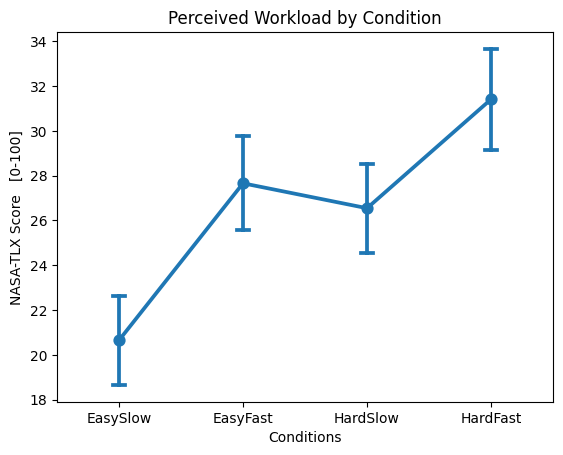

In [113]:
# Interaction plot with denormalized score
custom_labels = ['EasySlow', 'EasyFast', 'HardSlow', 'HardFast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score', errorbar='se', markers='o', capsize=.1)
plt.title('Perceived Workload by Condition')
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels)
plt.xlabel('Conditions')
plt.ylabel('NASA-TLX Score   [0-100]')
plt.show()

##### Pairwise T-Tests on Overall Workload with Difficulty
- (Difficulty) Alternative, p-value

In [114]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
df['NASA_TLX_Score_sqrt'] = df['NASA_TLX_Score'].apply(lambda x: np.sqrt(x))
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Easy', 'Hard']
pivot_df = pivot_df.reset_index()

In [115]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Easy'], y=pivot_df['Hard'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative   p-val         CI95%   cohen-d  BF10  \
T-test -2.993194   18        less  0.0039  [-inf, -0.2]  0.440006  12.8   

           power  
T-test  0.579378  


In [116]:
# Effect size
mean_diff = pivot_df['Hard'].mean() - pivot_df['Easy'].mean()
std_easy = pivot_df['Easy'].std()
std_hard = pivot_df['Hard'].std()
pooled_std = np.sqrt((std_easy**2 + std_hard**2) / 2)

effect_size_sqrt = mean_diff / pooled_std
effect_size = effect_size_sqrt ** 2

print(f"Effect size: {effect_size:.3f}")

Effect size: 0.194


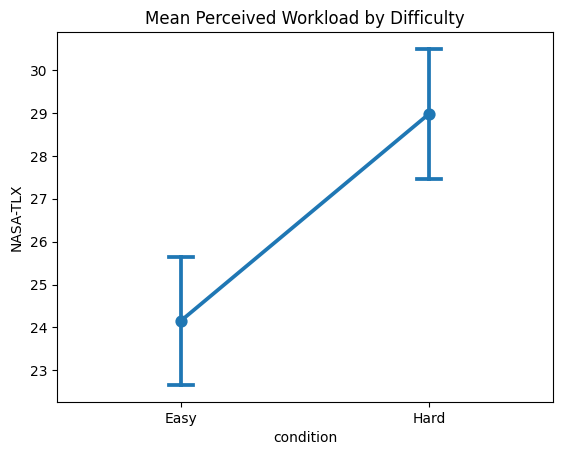

In [117]:
# Interaction plot with denormalized score
df['NASA_TLX_Score_original'] = df['NASA_TLX_Score_sqrt'] ** 2
custom_labels = ['Easy', 'Hard']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Difficulty')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

##### Pairwise T-Tests on Overall Workload with Frequency
- (Frequency) Alternative, p-value

In [118]:
# Setup (sqrt-normalized)
block_type_mapping = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 1,
    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Aggregate and reshape dataset
df['NASA_TLX_Score_sqrt'] = df['NASA_TLX_Score'].apply(lambda x: np.sqrt(x))
aggregated_df = df.groupby(['participant_id', 'condition'], as_index=False)['NASA_TLX_Score_sqrt'].mean()
pivot_df = aggregated_df.pivot(index='participant_id', columns='condition', values='NASA_TLX_Score_sqrt')

# Rename columns for clarity
pivot_df.columns = ['Slow', 'Fast']
pivot_df = pivot_df.reset_index()

In [119]:
# Paired t-test (one-tailed)
paired_ttest_results = pg.ttest(x=pivot_df['Slow'], y=pivot_df['Fast'], paired=True, alternative='less')
print(paired_ttest_results)

               T  dof alternative     p-val          CI95%   cohen-d    BF10  \
T-test -4.013559   18        less  0.000407  [-inf, -0.33]  0.531263  88.355   

           power  
T-test  0.719876  


In [120]:
# Effect size
mean_diff = pivot_df['Fast'].mean() - pivot_df['Slow'].mean()
std_easy = pivot_df['Slow'].std()
std_hard = pivot_df['Fast'].std()
pooled_std = np.sqrt((std_easy**2 + std_hard**2) / 2)

effect_size_sqrt = mean_diff / pooled_std
effect_size = effect_size_sqrt ** 2

print(f"Effect size: {effect_size:.3f}")

Effect size: 0.282


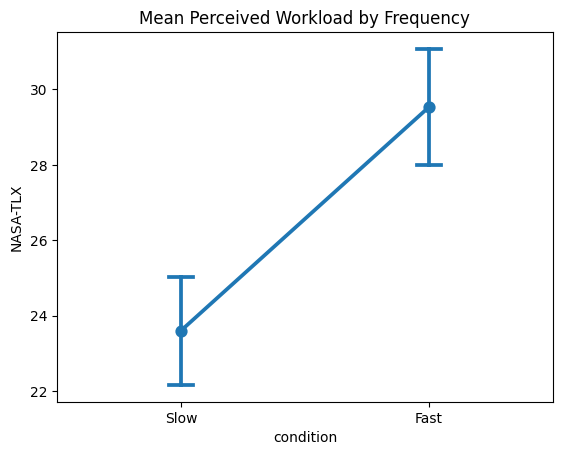

In [121]:
# Interaction plot with denormalized score
df['NASA_TLX_Score_original'] = df['NASA_TLX_Score_sqrt'] ** 2
custom_labels = ['Slow', 'Fast']

sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_original', errorbar='se', markers='o', capsize=.1)
plt.title('Mean Perceived Workload by Frequency')
plt.xticks(ticks=[0, 1], labels=custom_labels)
# plt.ylim(0, 100)
plt.ylabel('NASA-TLX')
plt.show()

##### Results Tables and Plots

In [10]:
# Rescale NASA-TLX to  [1-21]
min_old, max_old = 0, 100
min_new, max_new = 1, 21
df['NASA_TLX_Score_Original'] = (df['NASA_TLX_Score']  / 100) * 20 + 1

In [123]:
# ANOVA Results
art_anova_results = {
    'Effect': ['Difficulty', 'Frequency', 'Difficulty:Frequency'],
    'p-value': [7.0255e-05, 8.6041e-06, 0.59017],
    '': ["***", "***", ""]
}
art_anova_results_df = pd.DataFrame(art_anova_results)
art_anova_results_df.style.format({
    "F-value": "{:.3f}",
    "p-value": lambda x: "{:.1e}".format(x) if x < 0.001 else "{:.3f}".format(x)
}).set_caption("Aligned Rank Transform for Factorial Repeated Measures ANOVA")

,Effect,p-value,
0,Difficulty,7.0e-05,***
1,Frequency,8.6e-06,***
2,Difficulty:Frequency,0.590,


In [124]:
# One-tailed Paired t-tests Results
t_test_results = {
    'Effect': ['Difficulty', 'Frequency'],
    'Contrast': ['Easy < Hard', 'Slow < Fast'],
    'p-value': [0.0039, 0.000407],
    'cohen-d': [0.440006, 0.531263],
    'power': [0.579378, 0.719876],
    '': [" **", "***"]
}
t_test_results_df = pd.DataFrame(t_test_results)
t_test_results_df.style.format({
    "p-value": lambda x: "{:.1e}".format(x) if x < 0.001 else "{:.3f}".format(x),
    "cohen-d": "{:.3f}",
    "power": "{:.3f}"
}).set_caption("One-tailed Pairwise T-Tests")

,Effect,Contrast,p-value,cohen-d,power,
0,Difficulty,Easy < Hard,0.004,0.440,0.579,**
1,Frequency,Slow < Fast,4.1e-04,0.531,0.720,***


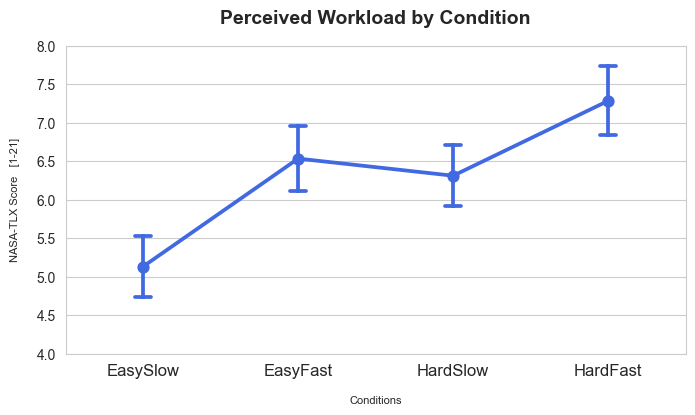

In [6]:
# ANOVA Plot
# setup
block_type_mapping = {
    1: 1,    2: 2,    3: 3,    4: 4,
    5: 1,    6: 2,    7: 3,    8: 4
}
block_type_mapping_dif = {
    1: 'Easy',    2: 'Easy',    3: 'Hard',    4: 'Hard',
    5: 'Easy',    6: 'Easy',    7: 'Hard',    8: 'Hard'
}
block_type_mapping_freq = {
    1: 'Slow',    2: 'Fast',    3: 'Slow',    4: 'Fast',
    5: 'Slow',    6: 'Fast',    7: 'Slow',    8: 'Fast'
}

df['condition'] = df['block_type'].map(block_type_mapping)
df['difficulty'] = df['block_type'].map(block_type_mapping_dif)
df['frequency'] = df['block_type'].map(block_type_mapping_freq)

# plot
custom_labels = ['EasySlow', 'EasyFast', 'HardSlow', 'HardFast']
plt.figure(figsize=(8, 4))
sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_Original', errorbar='se', markers='o', capsize=.1, color="#4169E1")
plt.title('Perceived Workload by Condition', fontsize=14, weight='bold', pad=16)
plt.xticks(ticks=[0, 1, 2, 3], labels=custom_labels, fontsize=12)
plt.xlabel('Conditions', fontsize=8, labelpad=12)
plt.ylabel('NASA-TLX Score   [1-21]', fontsize=8, labelpad=12)
plt.ylim(4, 8)
sns.set_style("whitegrid")
plt.show()

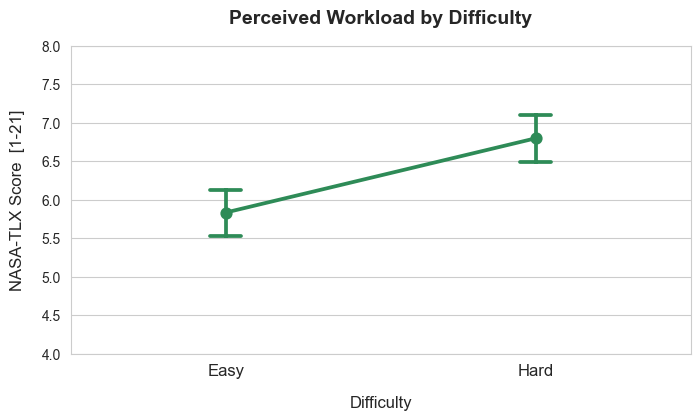

In [11]:
# Difficulty Plot
# # setup
block_type_mapping = {
    1: 1,    2: 1,    3: 2,    4: 2,
    5: 1,    6: 1,    7: 2,    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Interaction plot with denormalized score
custom_labels = ['Easy', 'Hard']
plt.figure(figsize=(8, 4))
sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_Original', errorbar='se', markers='o', capsize=.1, color='#2E8B57')
plt.title('Perceived Workload by Difficulty', fontsize=14, weight='bold', pad=16)
plt.xticks(ticks=[0, 1], labels=custom_labels, fontsize=12)
plt.xlabel('Difficulty', fontsize=12, labelpad=12)
plt.ylabel('NASA-TLX Score  [1-21]', fontsize=12, labelpad=12)
plt.ylim(4, 8)
sns.set_style("whitegrid")
plt.show()

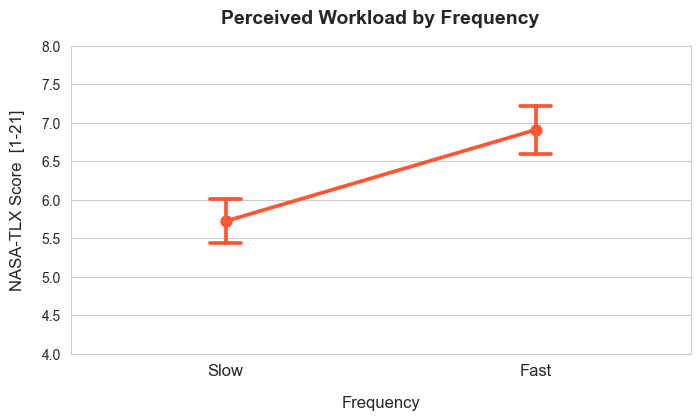

In [12]:
# Frequency Plot
# # setup
block_type_mapping = {
    1: 1,    2: 2,    3: 1,    4: 2,
    5: 1,    6: 2,    7: 1,    8: 2
}
df['condition'] = df['block_type'].map(block_type_mapping)

# Interaction plot with denormalized score
custom_labels = ['Slow', 'Fast']
plt.figure(figsize=(8, 4))
sns.pointplot(data=df, x='condition', y='NASA_TLX_Score_Original', errorbar='se', markers='o', capsize=.1, color='#FF5733')
plt.title('Perceived Workload by Frequency', fontsize=14, weight='bold', pad=16)
plt.xticks(ticks=[0, 1], labels=custom_labels, fontsize=12)
plt.xlabel('Frequency', fontsize=12, labelpad=12)
plt.ylabel('NASA-TLX Score  [1-21]', fontsize=12, labelpad=12)
plt.ylim(4, 8)
sns.set_style("whitegrid")
plt.show()

In [20]:
# Summary Stats
mean = df.query("block_type == 1 or block_type == 2")['NASA_TLX_Score_Original'].mean()
se = df.query("block_type == 1 or block_type == 2")['NASA_TLX_Score_Original'].sem()
print(f"Easy = {mean:.2f} (~{se:.2f})")

mean = df.query("block_type == 3 or block_type == 4")['NASA_TLX_Score_Original'].mean()
se = df.query("block_type == 3 or block_type == 4")['NASA_TLX_Score_Original'].sem()
print(f"Hard = {mean:.2f} (~{se:.2f})")

mean = df.query("block_type == 1 or block_type == 3")['NASA_TLX_Score_Original'].mean()
se = df.query("block_type == 1 or block_type == 3")['NASA_TLX_Score_Original'].sem()
print(f"Slow = {mean:.2f} (~{se:.2f})")

mean = df.query("block_type == 2 or block_type == 4")['NASA_TLX_Score_Original'].mean()
se = df.query("block_type == 2 or block_type == 4")['NASA_TLX_Score_Original'].sem()
print(f"Fast = {mean:.2f} (~{se:.2f})")

Easy = 5.97 (~0.46)
Hard = 6.86 (~0.42)
Slow = 5.73 (~0.40)
Fast = 7.09 (~0.47)
